In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.decomposition import PCA
from scipy import stats
from matplotlib import rcParams
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
sns.set_style('whitegrid')
rcParams['figure.figsize'] = 10,7

In [3]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.shape

(70000, 13)

In [6]:
# Premilinary data cleaning

df['age'] = df['age'] // 365

df = df.drop(['id'],1)

df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Look for any missing values
for col in df.columns:
    print(col)
    print(df[col].isnull().sum())
    print()

age
0

gender
0

height
0

weight
0

ap_hi
0

ap_lo
0

cholesterol
0

gluc
0

smoke
0

alco
0

active
0

cardio
0



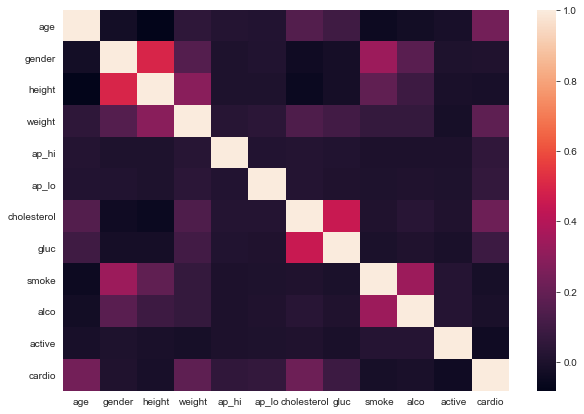

In [8]:
# Look for look for multi-colinearity between features
corrmat = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrmat)
plt.show()

In [9]:
corrmat

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029756,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


age age
Ttest_indResult(statistic=0.0, pvalue=1.0)


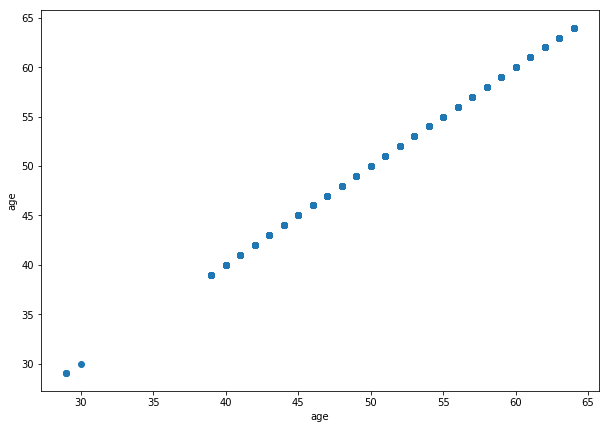


age gender
Ttest_indResult(statistic=2008.2784376105606, pvalue=0.0)


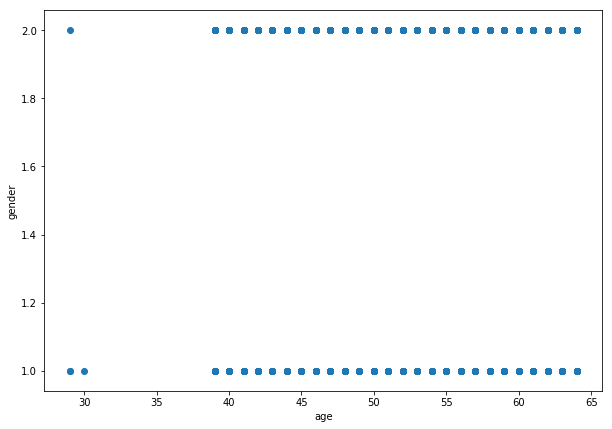


age height
Ttest_indResult(statistic=-2773.203702671817, pvalue=0.0)


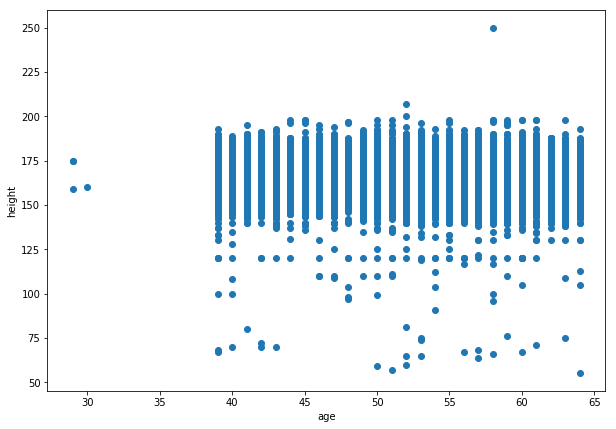


age weight
Ttest_indResult(statistic=-355.3602367822816, pvalue=0.0)


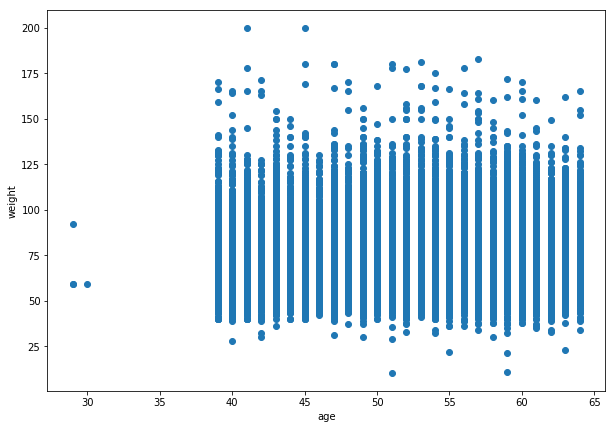


age ap_hi
Ttest_indResult(statistic=-130.39389131100634, pvalue=0.0)


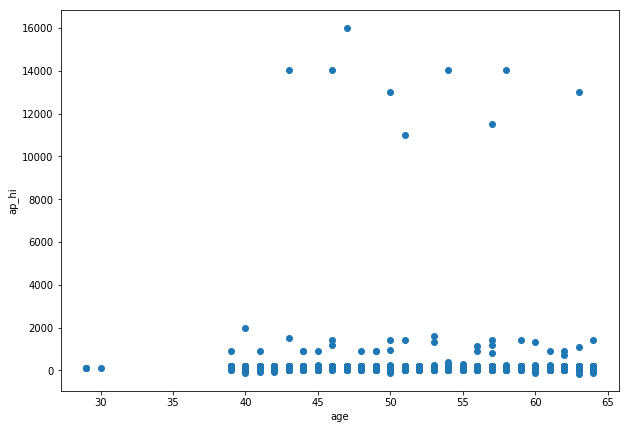


age ap_lo
Ttest_indResult(statistic=-61.43185395124337, pvalue=0.0)


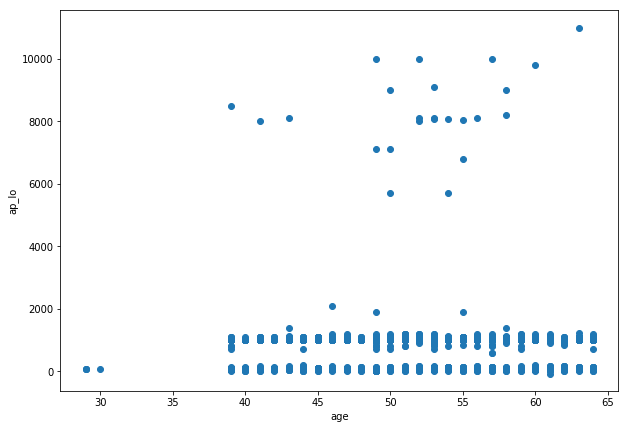


age cholesterol
Ttest_indResult(statistic=2002.4890543466386, pvalue=0.0)


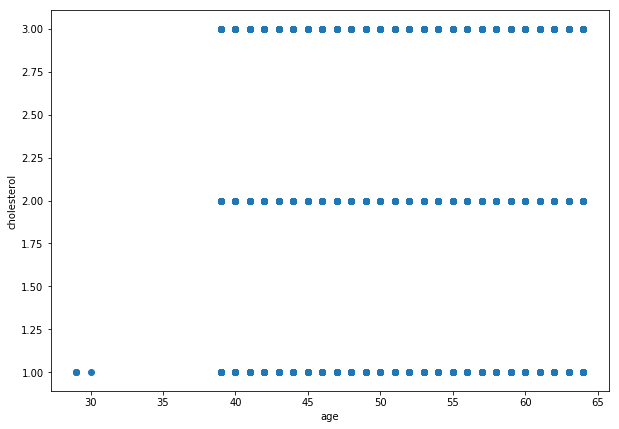


age gluc
Ttest_indResult(statistic=2010.8938226109428, pvalue=0.0)


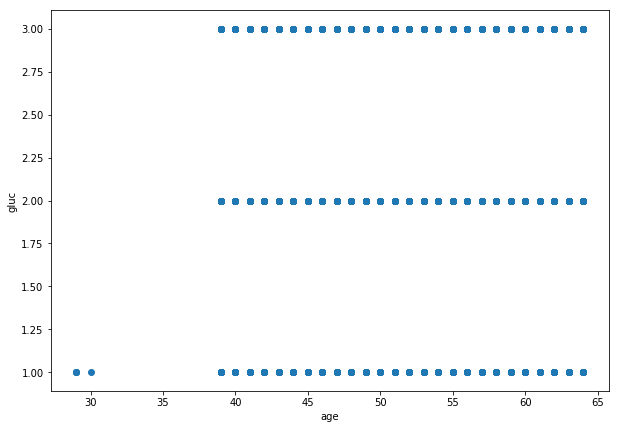


age smoke
Ttest_indResult(statistic=2060.7722413290303, pvalue=0.0)


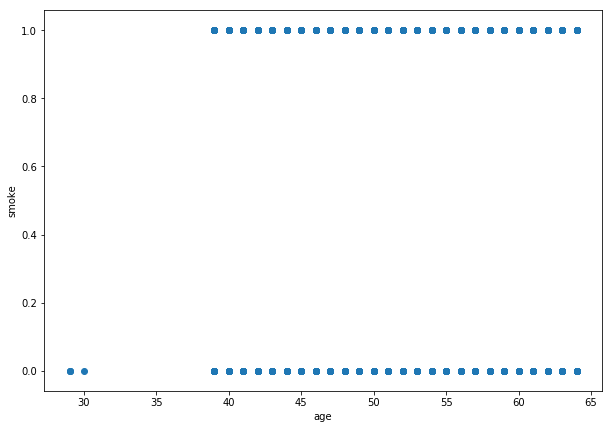


age alco
Ttest_indResult(statistic=2062.7774221267236, pvalue=0.0)


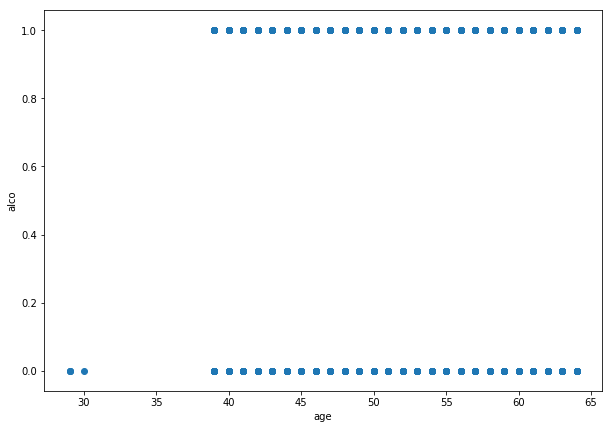


age active
Ttest_indResult(statistic=2031.1047559318997, pvalue=0.0)


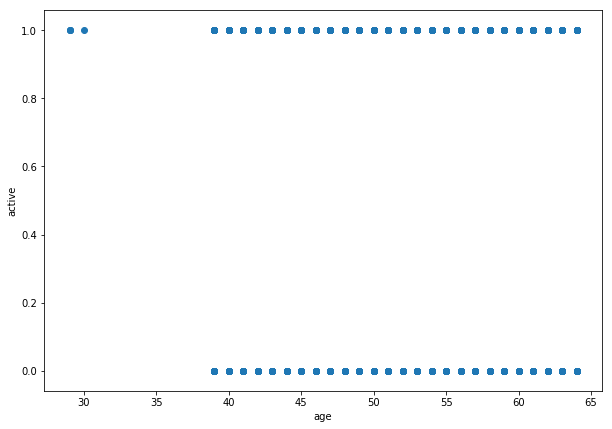


age cardio
Ttest_indResult(statistic=2040.9237376911728, pvalue=0.0)


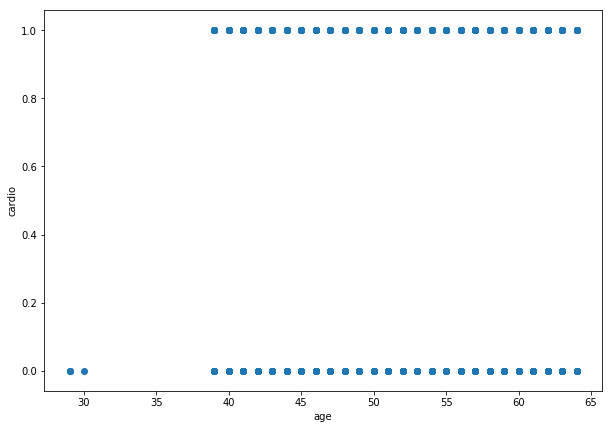


gender age
Ttest_indResult(statistic=-2008.2784376105606, pvalue=0.0)


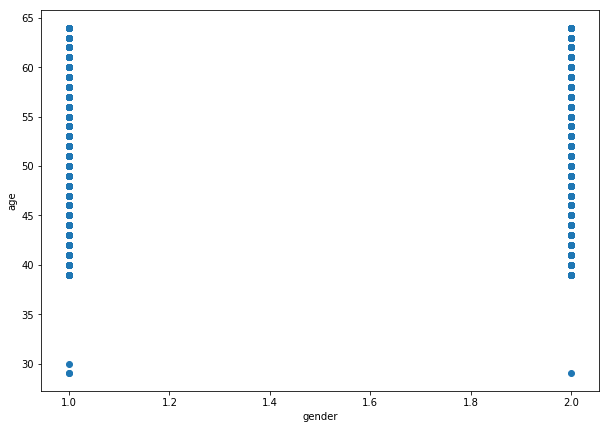


gender gender
Ttest_indResult(statistic=0.0, pvalue=1.0)


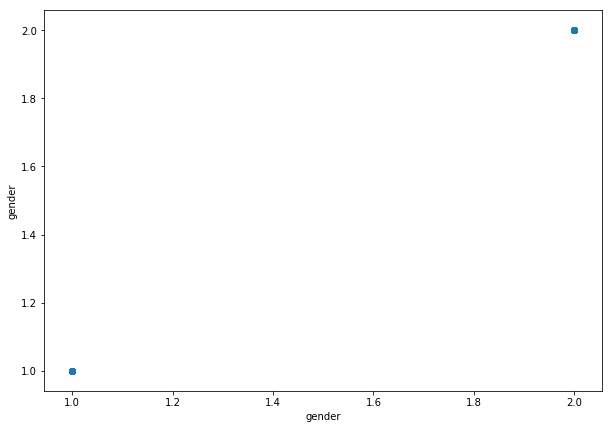


gender height
Ttest_indResult(statistic=-5244.224366360731, pvalue=0.0)


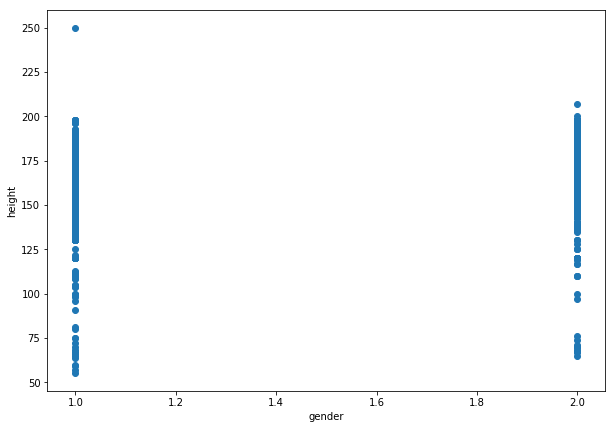


gender weight
Ttest_indResult(statistic=-1338.26597630856, pvalue=0.0)


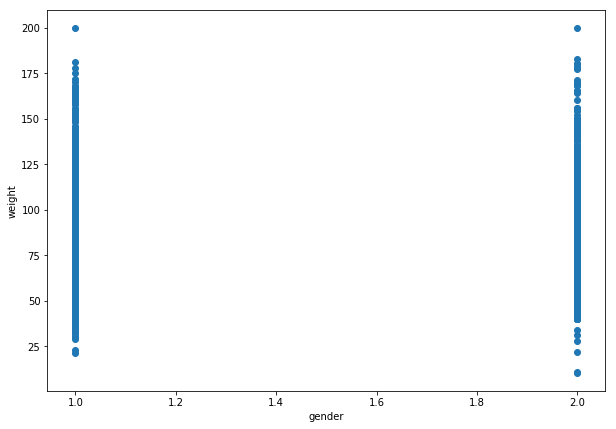


gender ap_hi
Ttest_indResult(statistic=-218.9748376900329, pvalue=0.0)


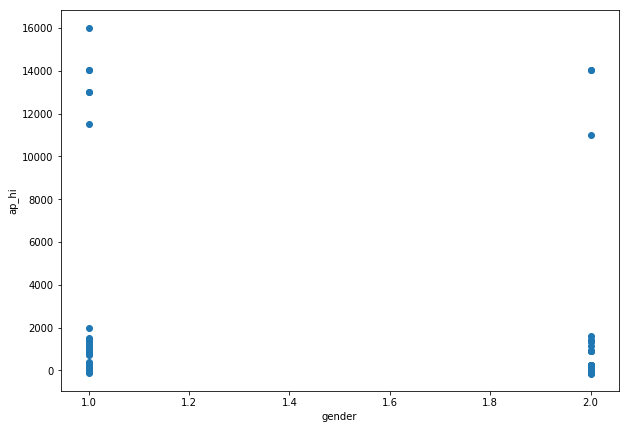


gender ap_lo
Ttest_indResult(statistic=-133.75350121738737, pvalue=0.0)


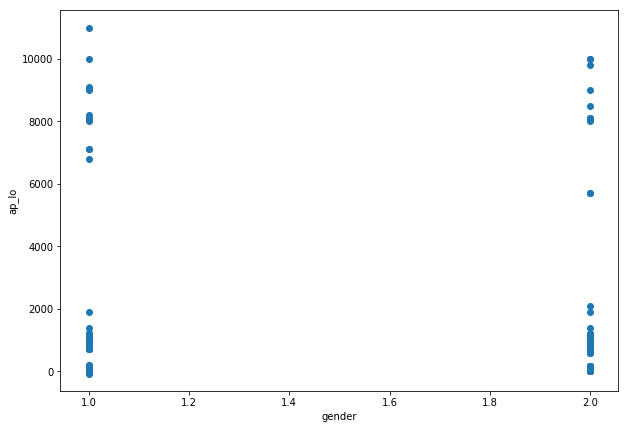


gender cholesterol
Ttest_indResult(statistic=-5.509781546247779, pvalue=3.599094850306846e-08)


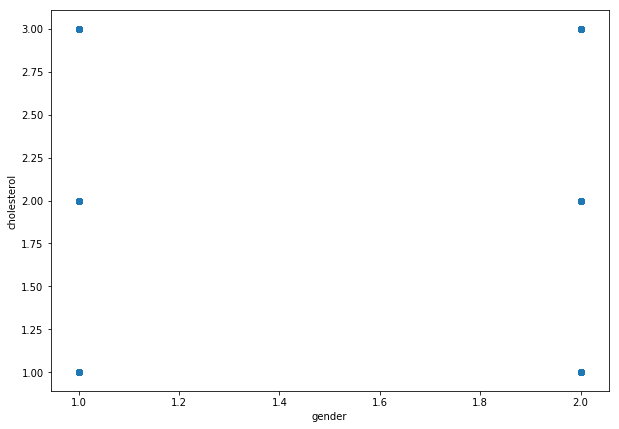


gender gluc
Ttest_indResult(statistic=43.72831300960851, pvalue=0.0)


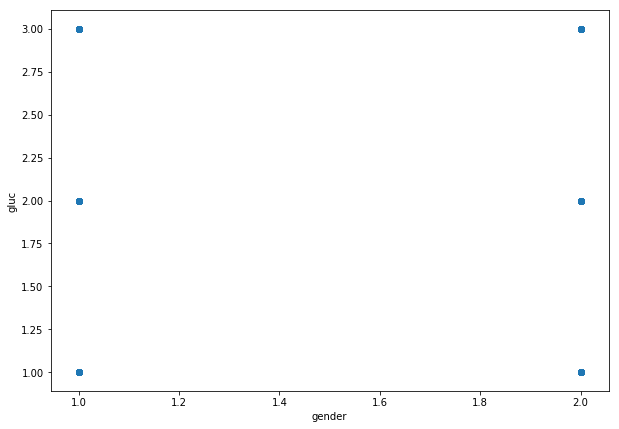


gender smoke
Ttest_indResult(statistic=601.6256496645525, pvalue=0.0)


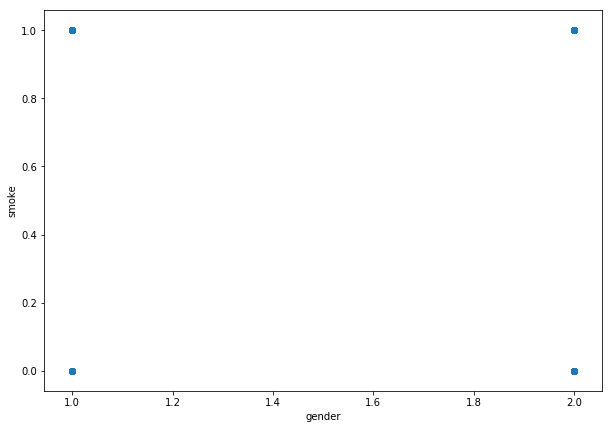


gender alco
Ttest_indResult(statistic=649.9280591689027, pvalue=0.0)


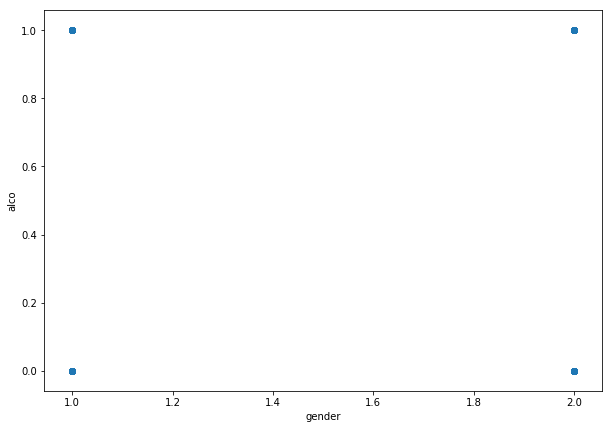


gender active
Ttest_indResult(statistic=232.7101897573213, pvalue=0.0)


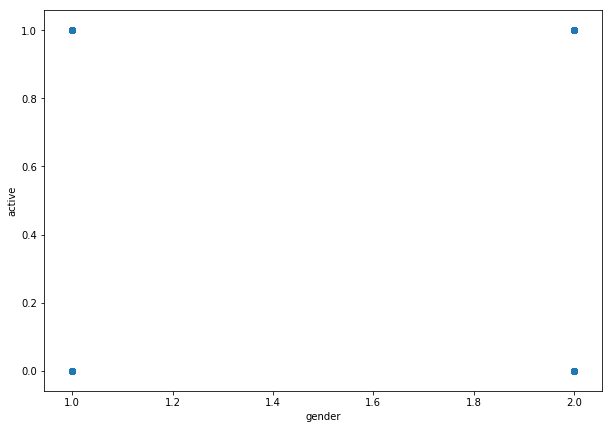


gender cardio
Ttest_indResult(statistic=325.44009677870207, pvalue=0.0)


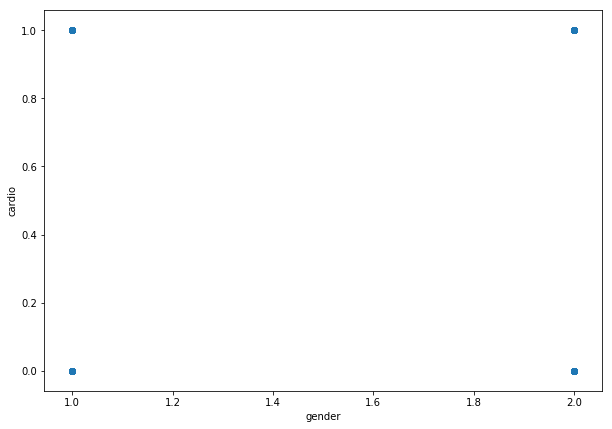


height age
Ttest_indResult(statistic=2773.203702671817, pvalue=0.0)


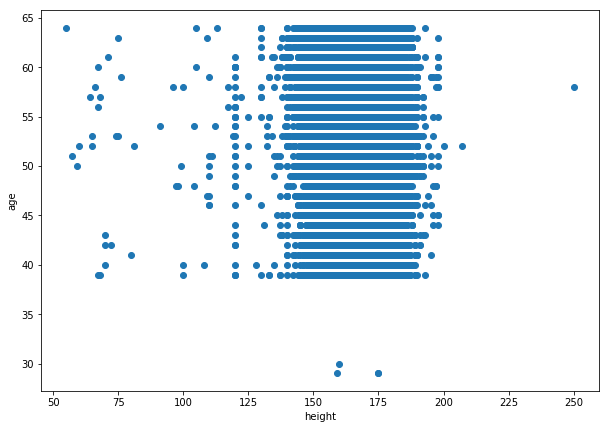


height gender
Ttest_indResult(statistic=5244.224366360731, pvalue=0.0)


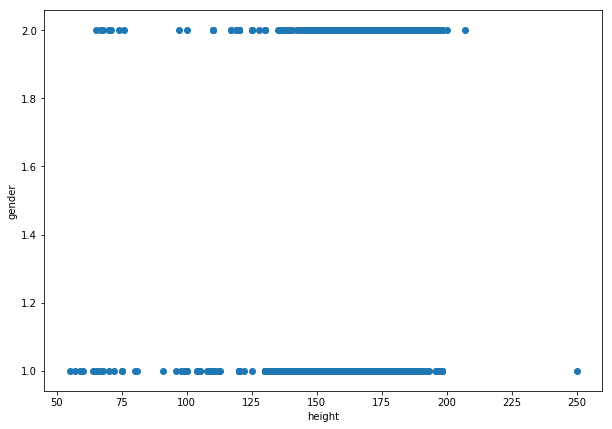


height height
Ttest_indResult(statistic=0.0, pvalue=1.0)


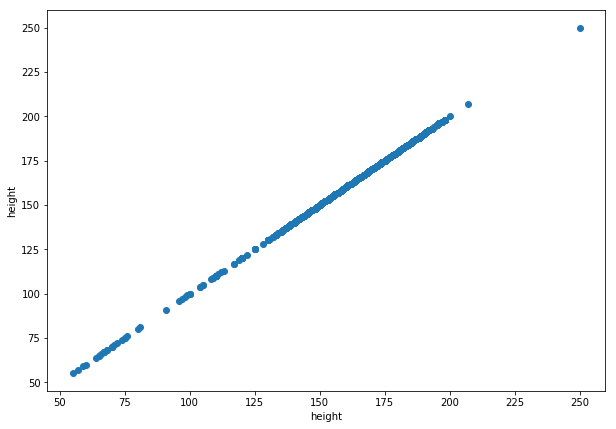


height weight
Ttest_indResult(statistic=1439.2848416649222, pvalue=0.0)


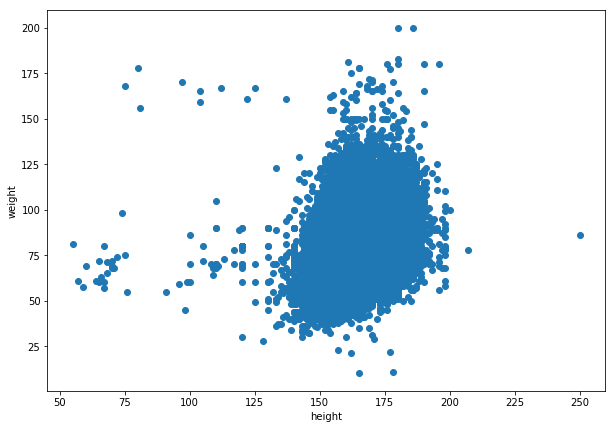


height ap_hi
Ttest_indResult(statistic=60.97068108150117, pvalue=0.0)


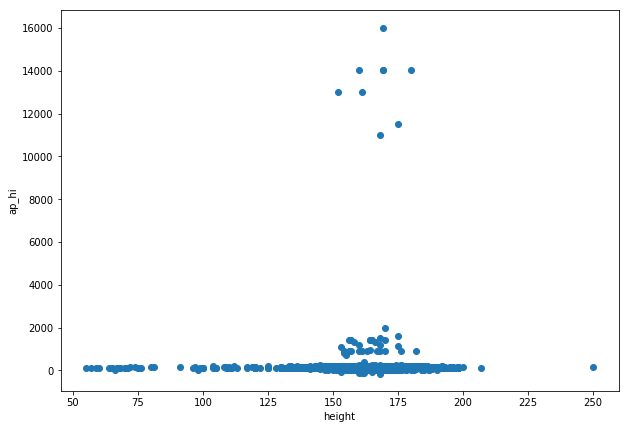


height ap_lo
Ttest_indResult(statistic=94.98669225025004, pvalue=0.0)


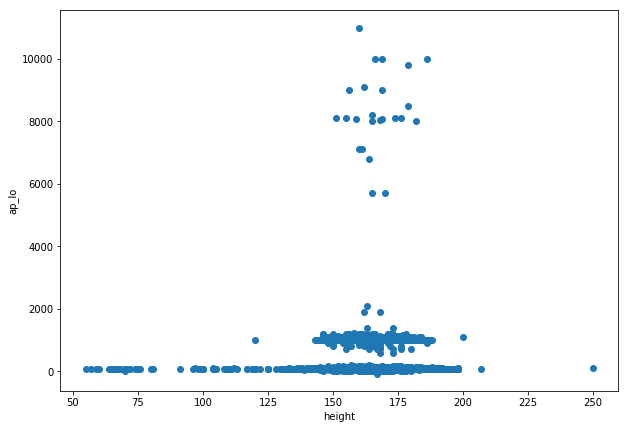


height cholesterol
Ttest_indResult(statistic=5234.567516689237, pvalue=0.0)


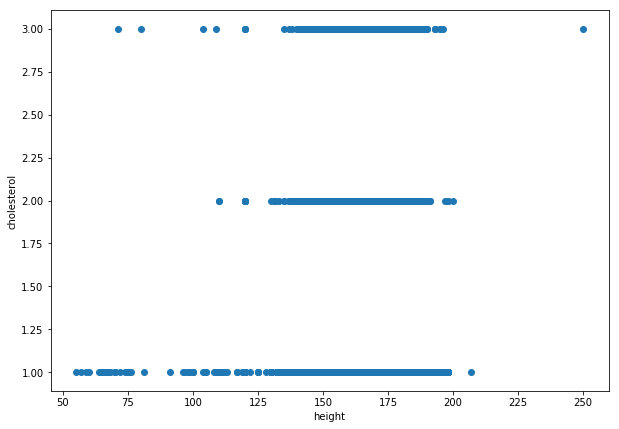


height gluc
Ttest_indResult(statistic=5244.304937607281, pvalue=0.0)


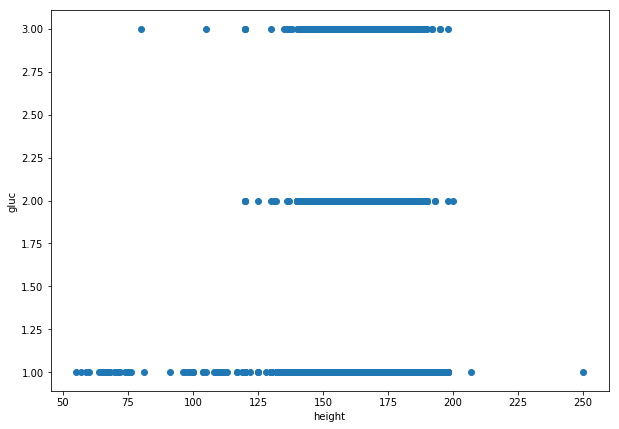


height smoke
Ttest_indResult(statistic=5290.559590139113, pvalue=0.0)


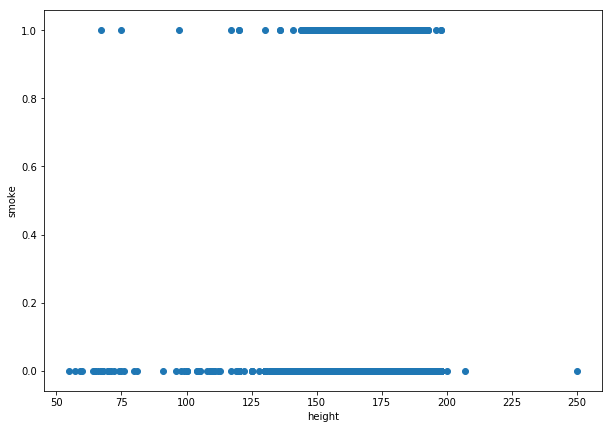


height alco
Ttest_indResult(statistic=5292.822347644206, pvalue=0.0)


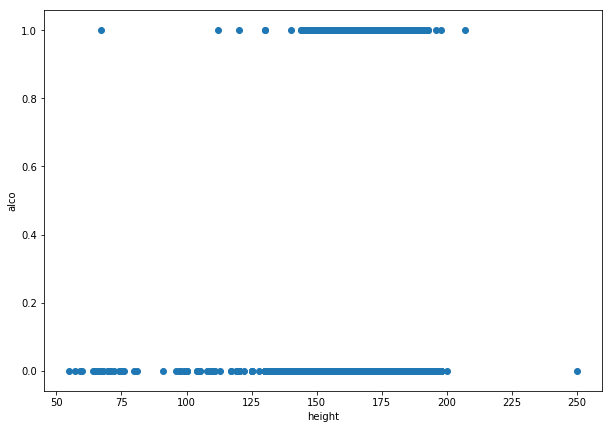


height active
Ttest_indResult(statistic=5264.49519748537, pvalue=0.0)


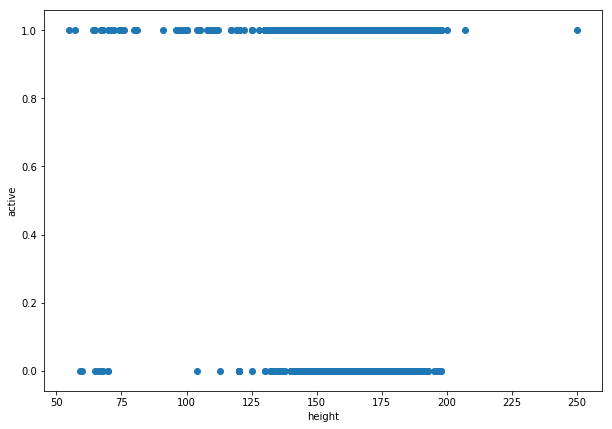


height cardio
Ttest_indResult(statistic=5270.684127151105, pvalue=0.0)


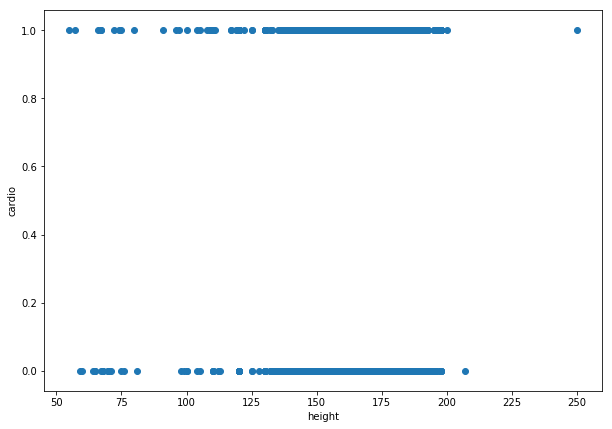


weight age
Ttest_indResult(statistic=355.3602367822816, pvalue=0.0)


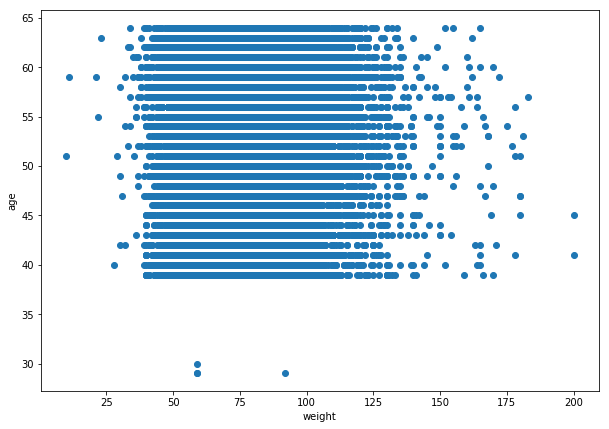


weight gender
Ttest_indResult(statistic=1338.26597630856, pvalue=0.0)


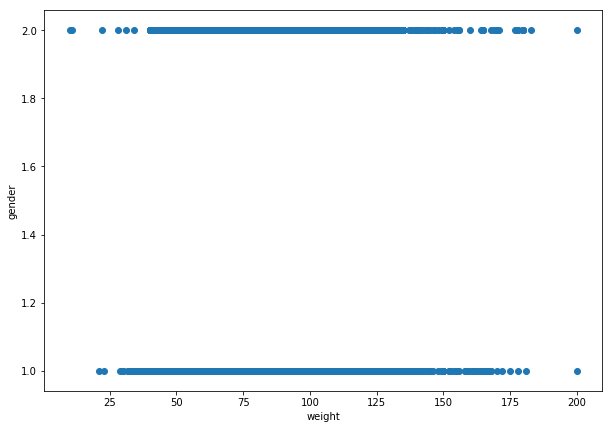


weight height
Ttest_indResult(statistic=-1439.2848416649222, pvalue=0.0)


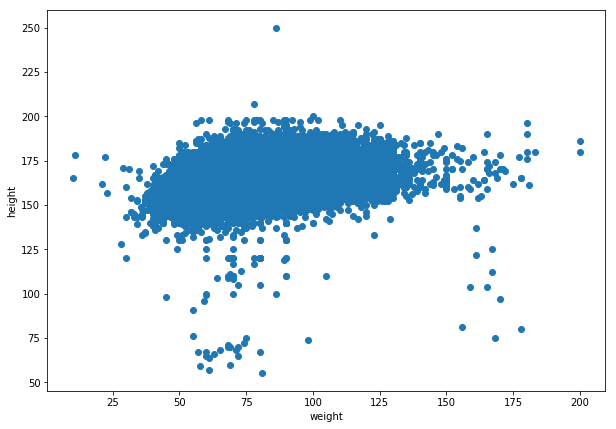


weight weight
Ttest_indResult(statistic=0.0, pvalue=1.0)


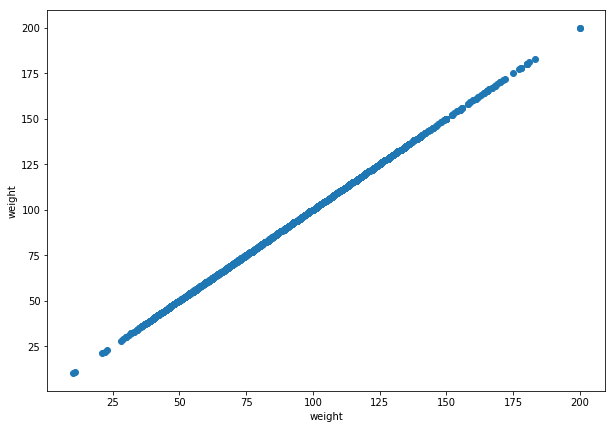


weight ap_hi
Ttest_indResult(statistic=-93.40970144692474, pvalue=0.0)


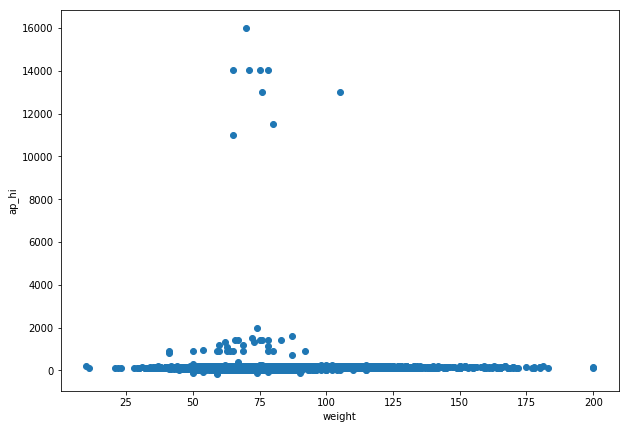


weight ap_lo
Ttest_indResult(statistic=-31.388090512202655, pvalue=1.6572855053494582e-215)


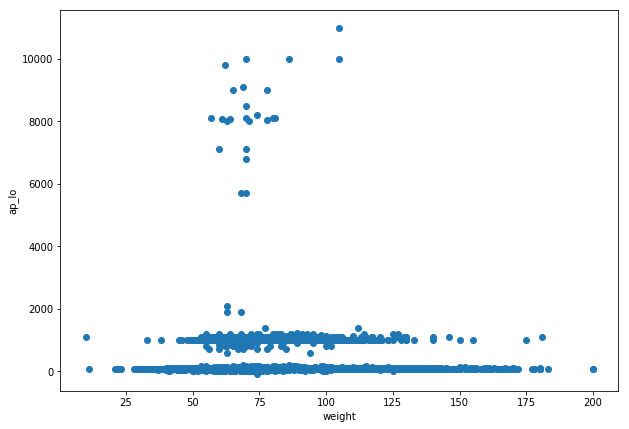


weight cholesterol
Ttest_indResult(statistic=1337.1899036474103, pvalue=0.0)


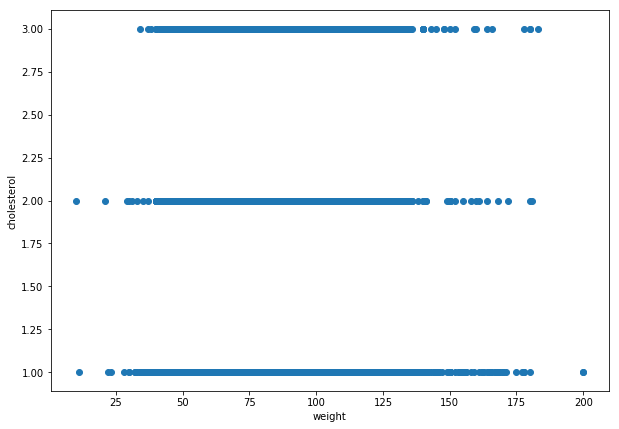


weight gluc
Ttest_indResult(statistic=1340.2040756250938, pvalue=0.0)


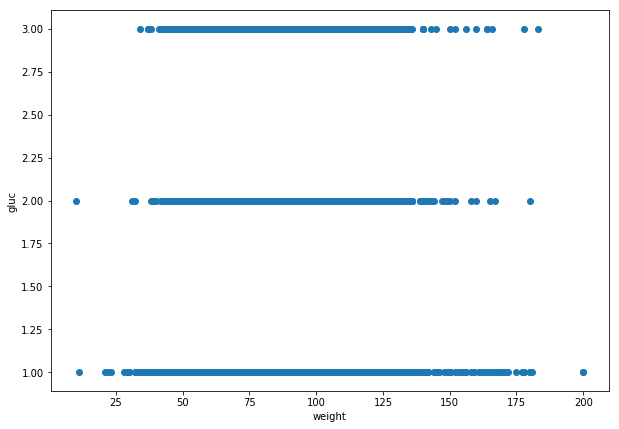


weight smoke
Ttest_indResult(statistic=1361.9195530411323, pvalue=0.0)


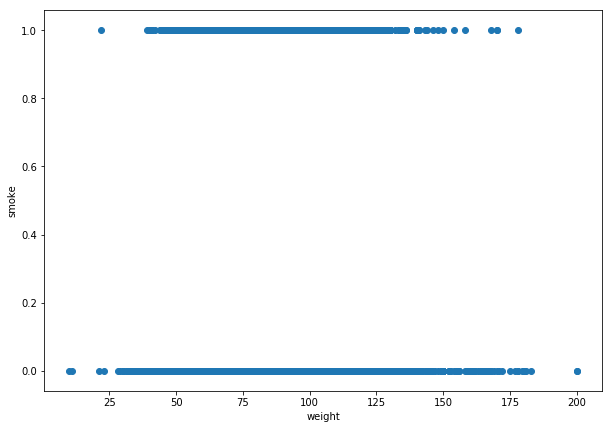


weight alco
Ttest_indResult(statistic=1362.647762975185, pvalue=0.0)


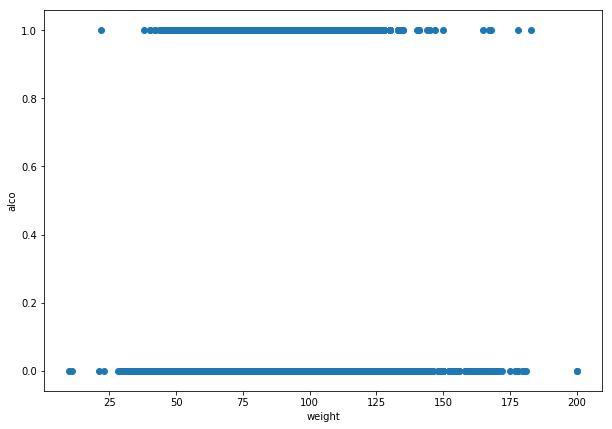


weight active
Ttest_indResult(statistic=1348.5186472951482, pvalue=0.0)


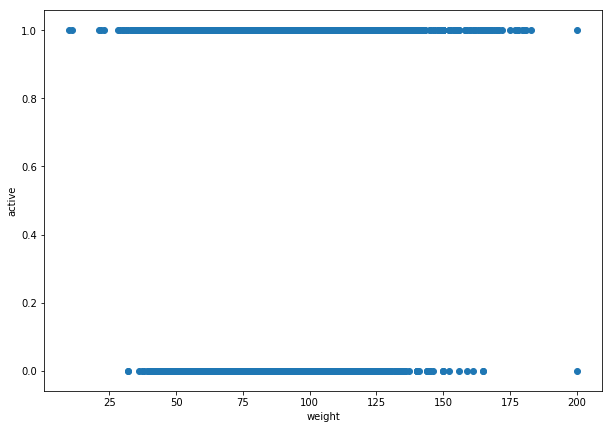


weight cardio
Ttest_indResult(statistic=1353.803107070296, pvalue=0.0)


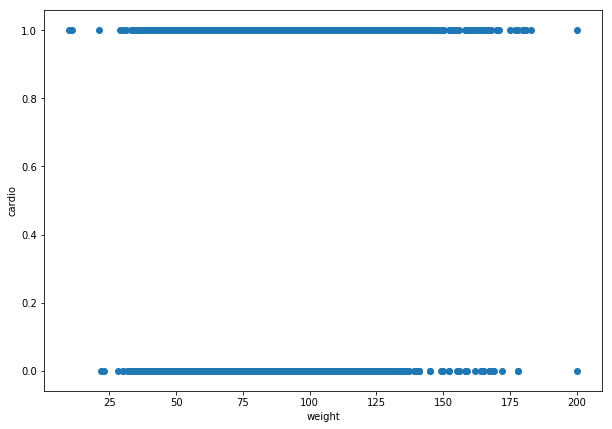


ap_hi age
Ttest_indResult(statistic=130.39389131100634, pvalue=0.0)


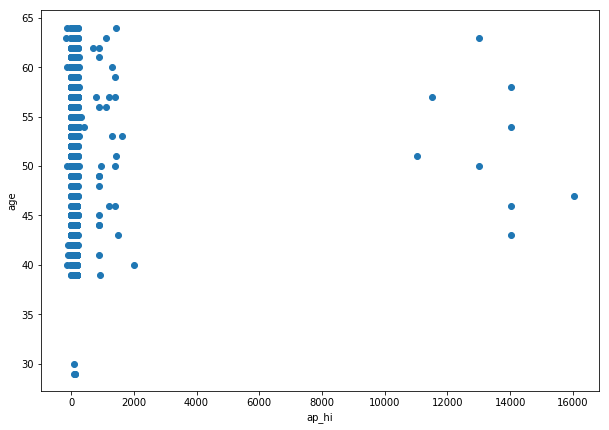


ap_hi gender
Ttest_indResult(statistic=218.9748376900329, pvalue=0.0)


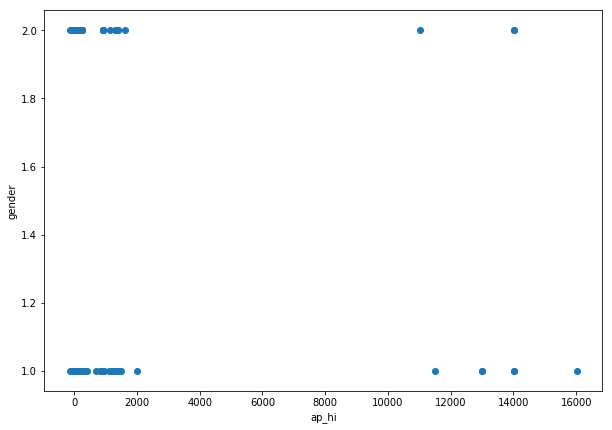


ap_hi height
Ttest_indResult(statistic=-60.97068108150117, pvalue=0.0)


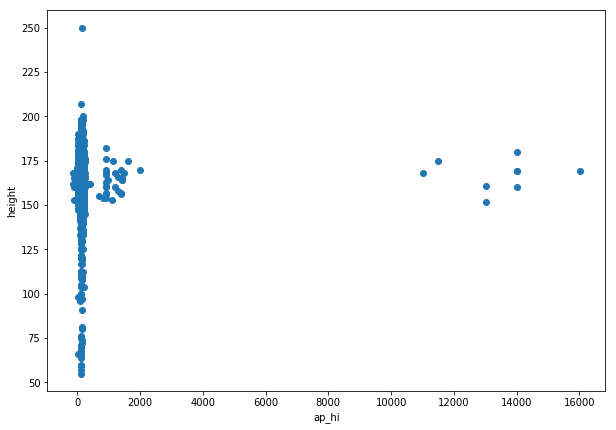


ap_hi weight
Ttest_indResult(statistic=93.40970144692474, pvalue=0.0)


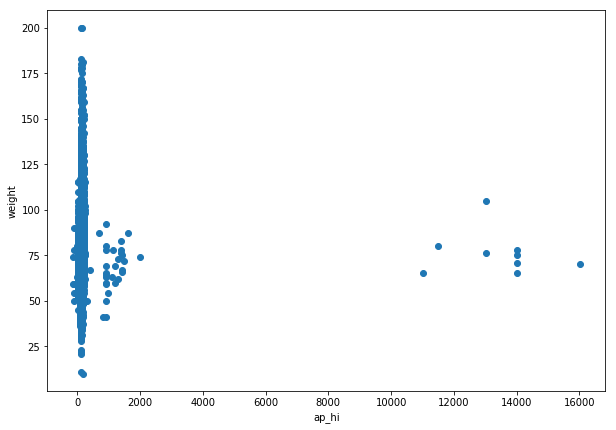


ap_hi ap_hi
Ttest_indResult(statistic=0.0, pvalue=1.0)


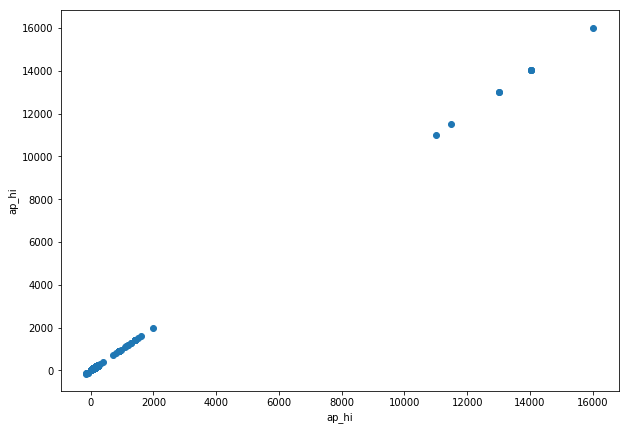


ap_hi ap_lo
Ttest_indResult(statistic=34.98767507121827, pvalue=4.9764708650109504e-267)


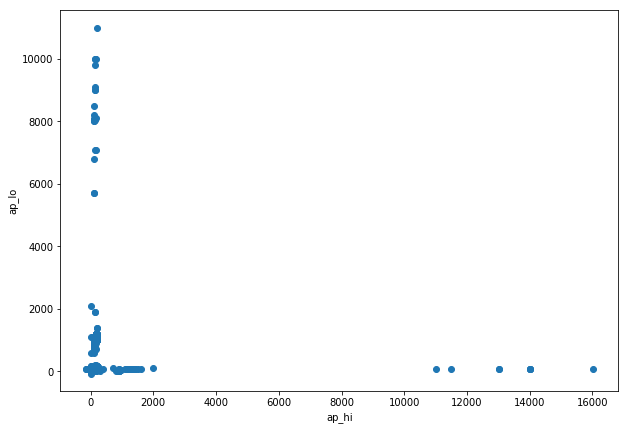


ap_hi cholesterol
Ttest_indResult(statistic=218.94403201938593, pvalue=0.0)


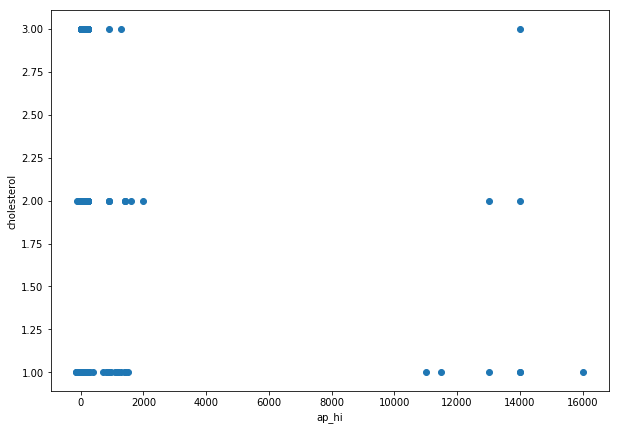


ap_hi gluc
Ttest_indResult(statistic=219.18587125851016, pvalue=0.0)


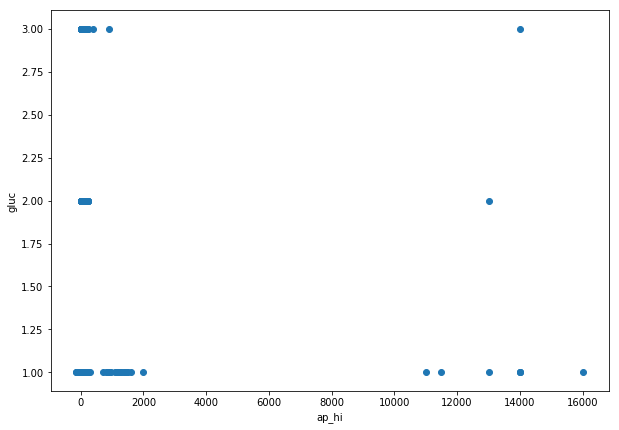


ap_hi smoke
Ttest_indResult(statistic=221.14253639501783, pvalue=0.0)


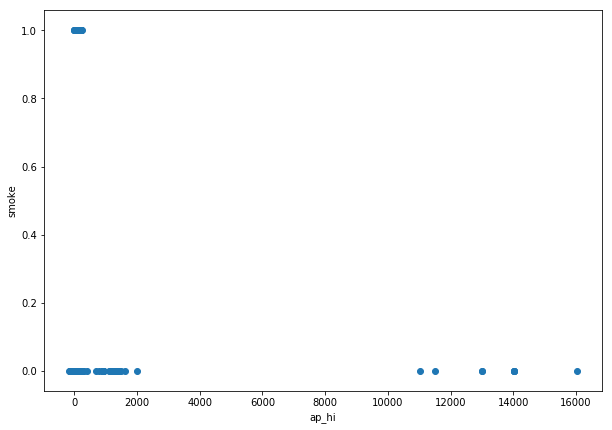


ap_hi alco
Ttest_indResult(statistic=221.2016956598169, pvalue=0.0)


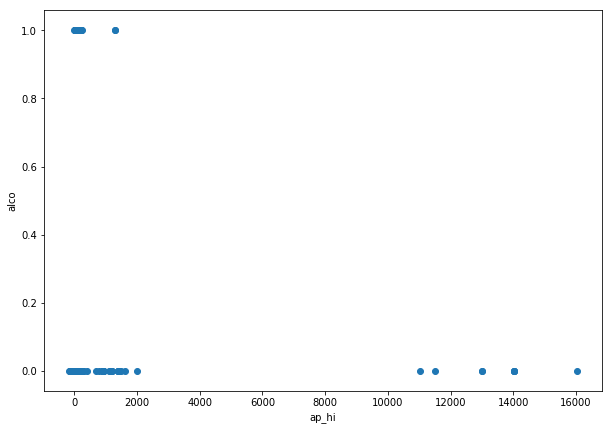


ap_hi active
Ttest_indResult(statistic=219.9128555390622, pvalue=0.0)


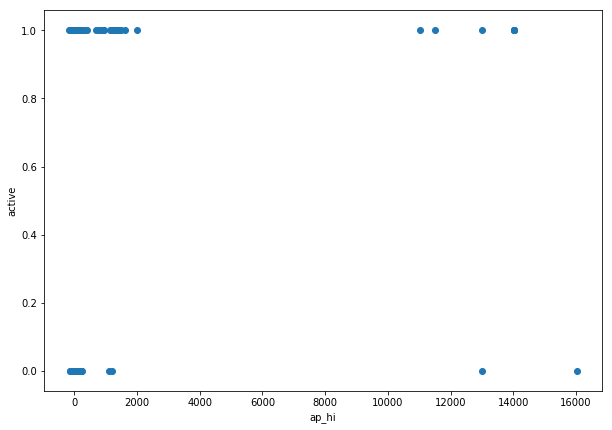


ap_hi cardio
Ttest_indResult(statistic=220.4347136756729, pvalue=0.0)


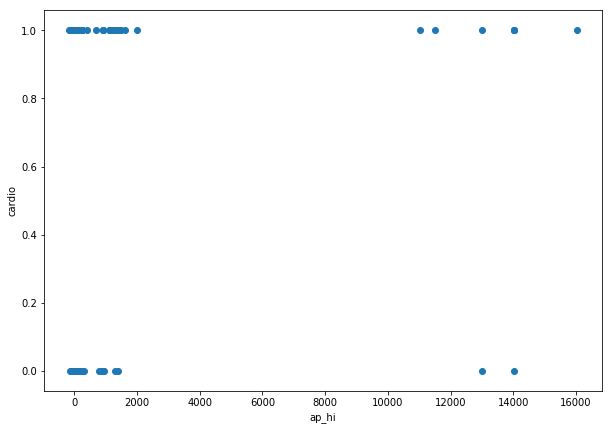


ap_lo age
Ttest_indResult(statistic=61.43185395124337, pvalue=0.0)


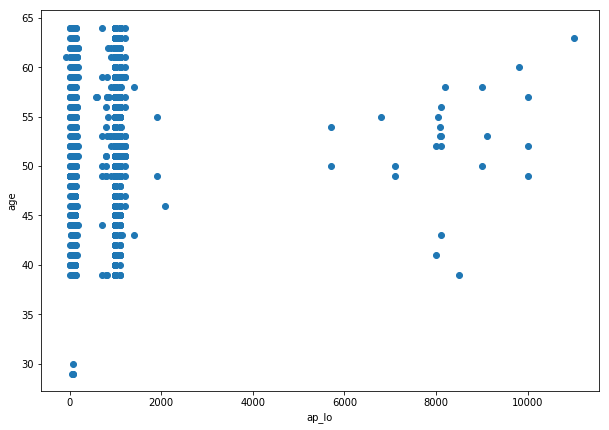


ap_lo gender
Ttest_indResult(statistic=133.75350121738737, pvalue=0.0)


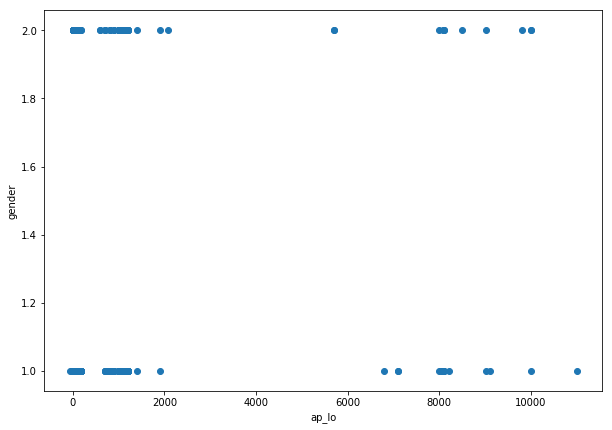


ap_lo height
Ttest_indResult(statistic=-94.98669225025004, pvalue=0.0)


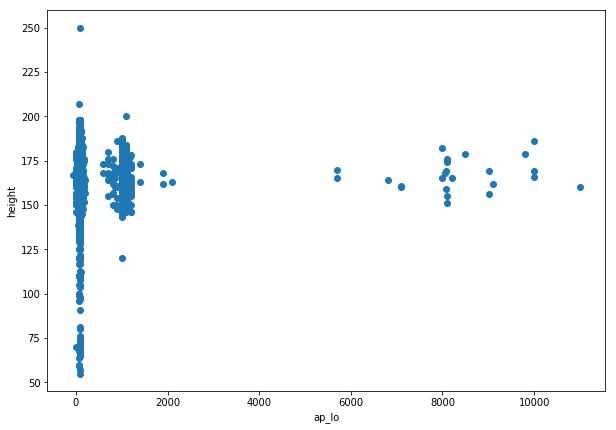


ap_lo weight
Ttest_indResult(statistic=31.388090512202655, pvalue=1.6572855053494582e-215)


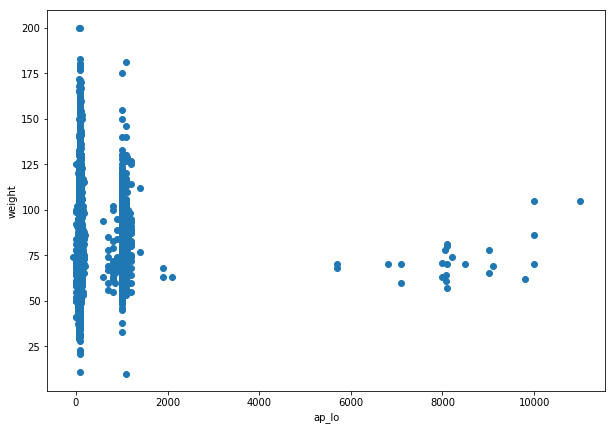


ap_lo ap_hi
Ttest_indResult(statistic=-34.98767507121827, pvalue=4.9764708650109504e-267)


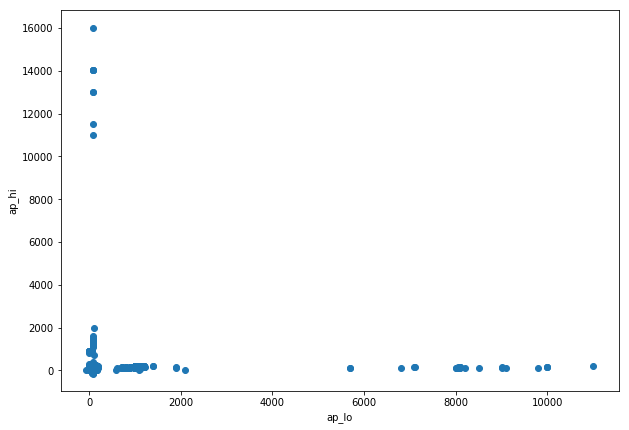


ap_lo ap_lo
Ttest_indResult(statistic=0.0, pvalue=1.0)


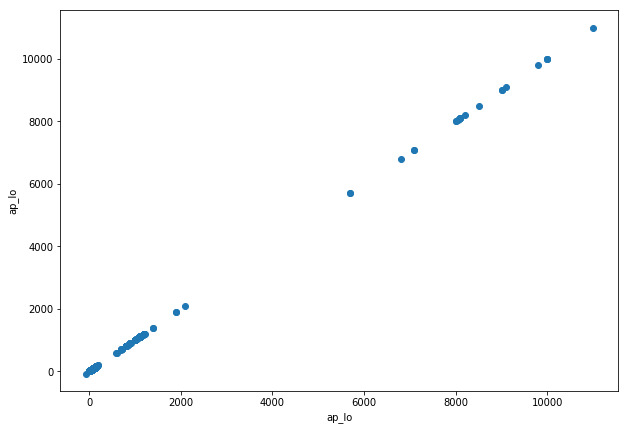


ap_lo cholesterol
Ttest_indResult(statistic=133.72877275837072, pvalue=0.0)


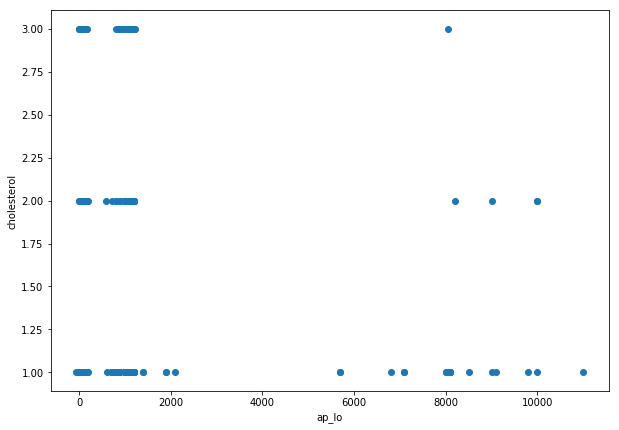


ap_lo gluc
Ttest_indResult(statistic=133.92613806098515, pvalue=0.0)


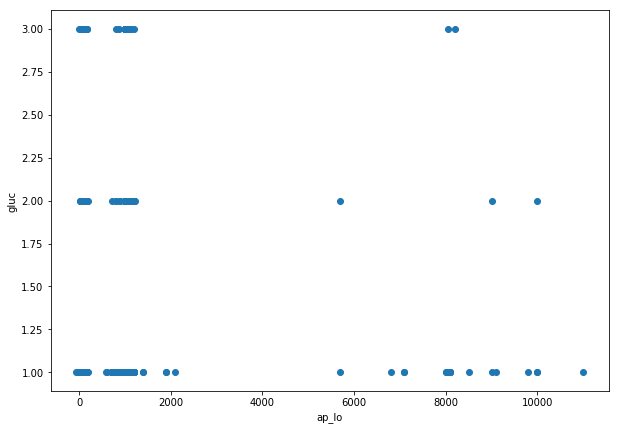


ap_lo smoke
Ttest_indResult(statistic=135.52457202523658, pvalue=0.0)


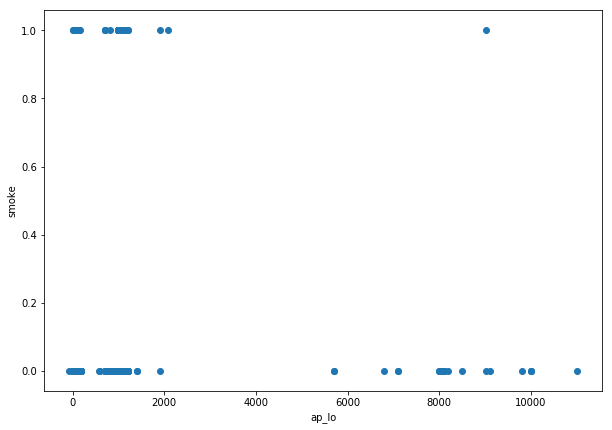


ap_lo alco
Ttest_indResult(statistic=135.57285831352766, pvalue=0.0)


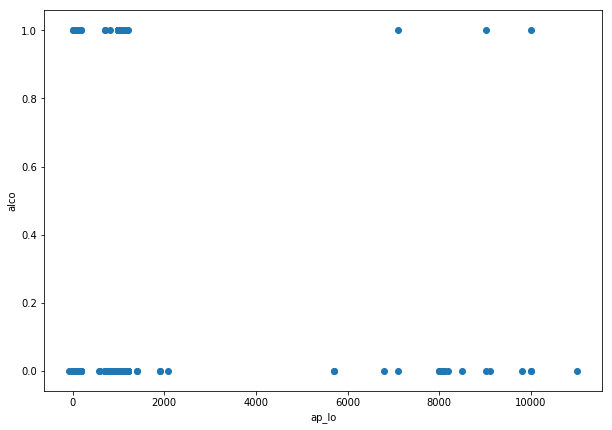


ap_lo active
Ttest_indResult(statistic=134.51987724728332, pvalue=0.0)


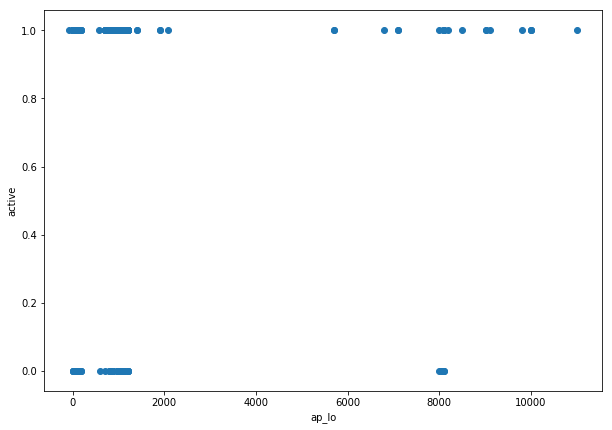


ap_lo cardio
Ttest_indResult(statistic=134.94649217213913, pvalue=0.0)


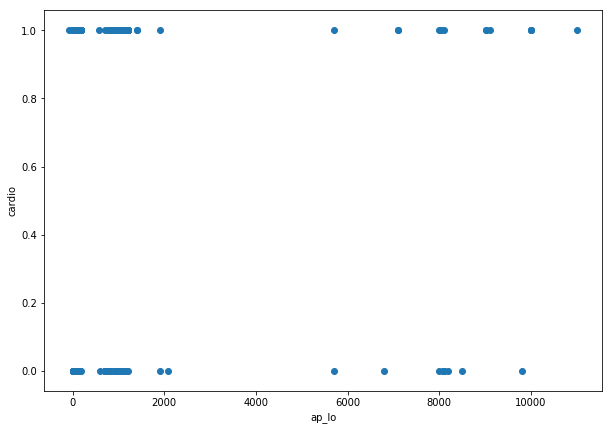


cholesterol age
Ttest_indResult(statistic=-2002.4890543466386, pvalue=0.0)


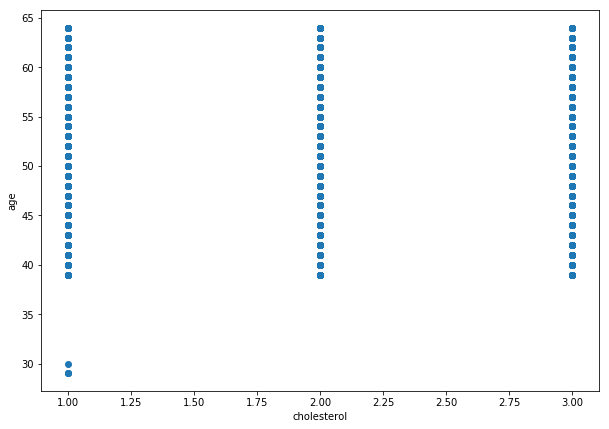


cholesterol gender
Ttest_indResult(statistic=5.509781546247779, pvalue=3.599094850306846e-08)


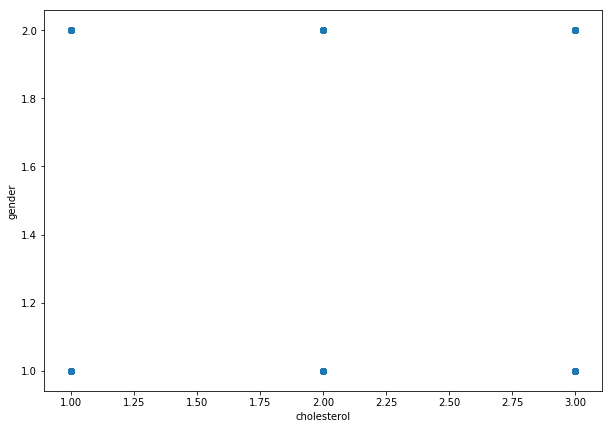


cholesterol height
Ttest_indResult(statistic=-5234.567516689237, pvalue=0.0)


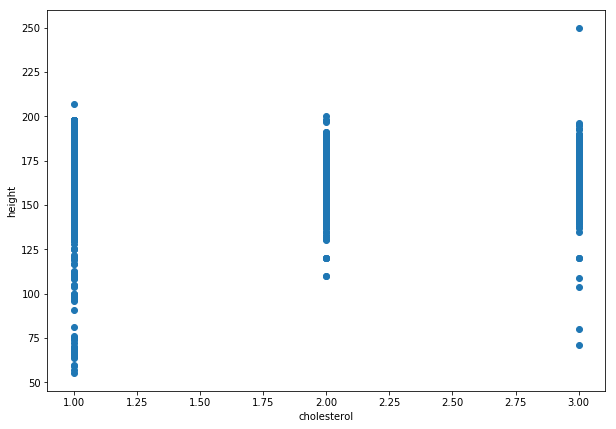


cholesterol weight
Ttest_indResult(statistic=-1337.1899036474103, pvalue=0.0)


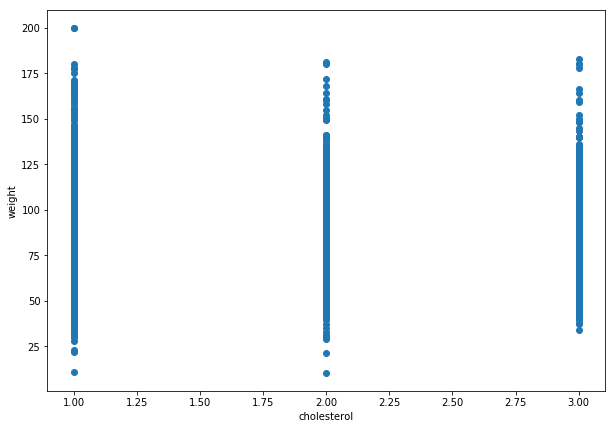


cholesterol ap_hi
Ttest_indResult(statistic=-218.94403201938593, pvalue=0.0)


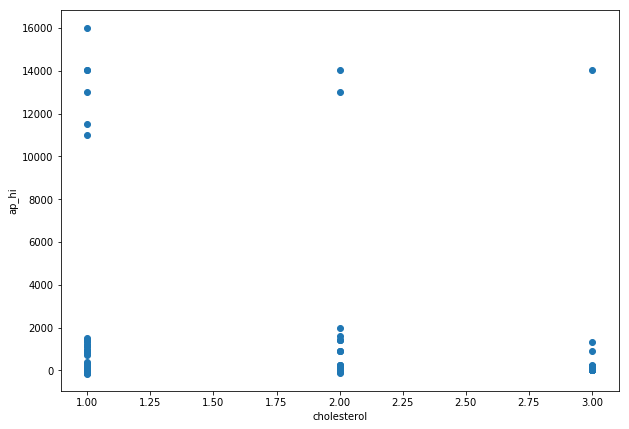


cholesterol ap_lo
Ttest_indResult(statistic=-133.72877275837072, pvalue=0.0)


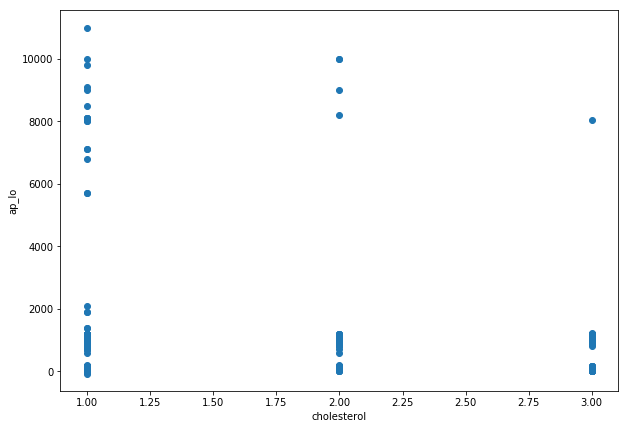


cholesterol cholesterol
Ttest_indResult(statistic=0.0, pvalue=1.0)


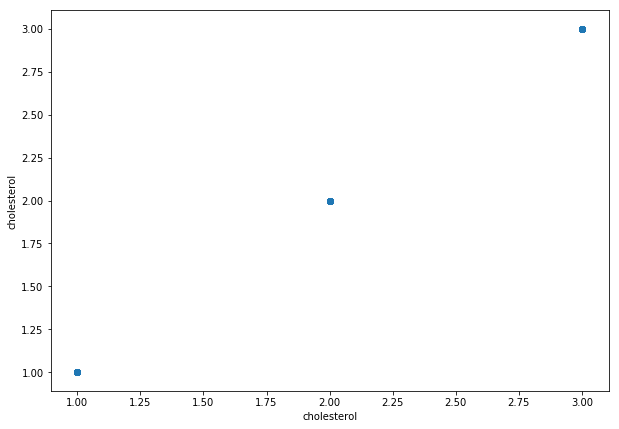


cholesterol gluc
Ttest_indResult(statistic=41.79097587099554, pvalue=0.0)


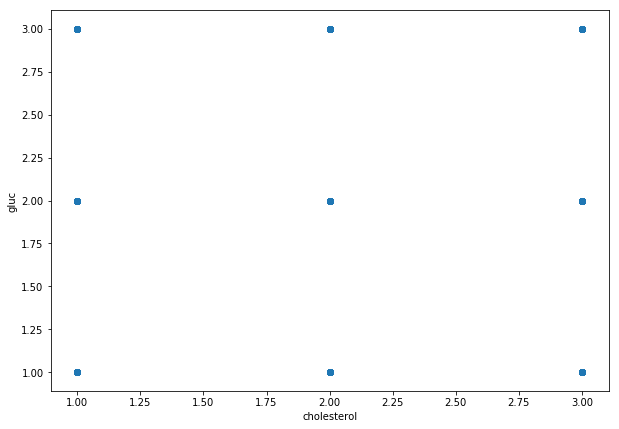


cholesterol smoke
Ttest_indResult(statistic=459.0826665523878, pvalue=0.0)


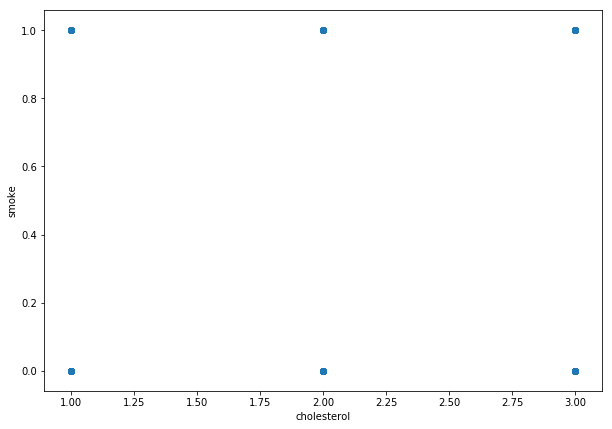


cholesterol alco
Ttest_indResult(statistic=484.75834887141895, pvalue=0.0)


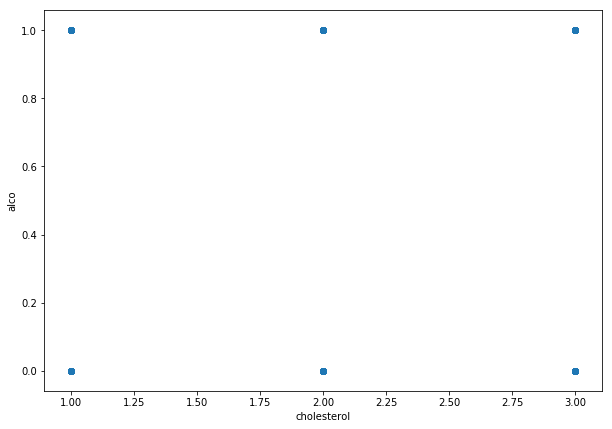


cholesterol active
Ttest_indResult(statistic=189.14706023509154, pvalue=0.0)


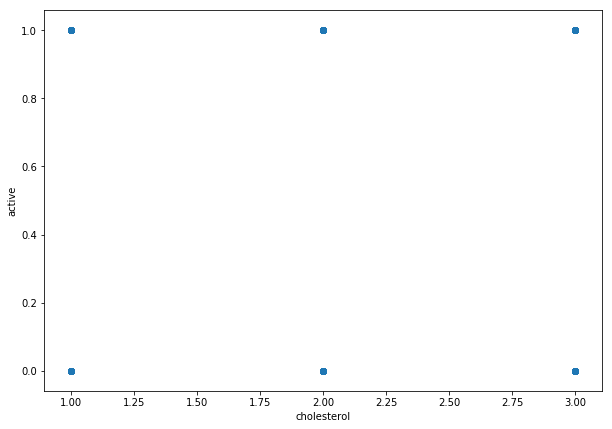


cholesterol cardio
Ttest_indResult(statistic=271.7610361769627, pvalue=0.0)


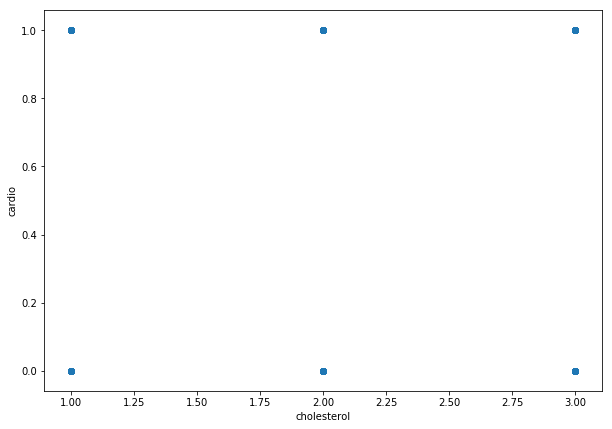


gluc age
Ttest_indResult(statistic=-2010.8938226109428, pvalue=0.0)


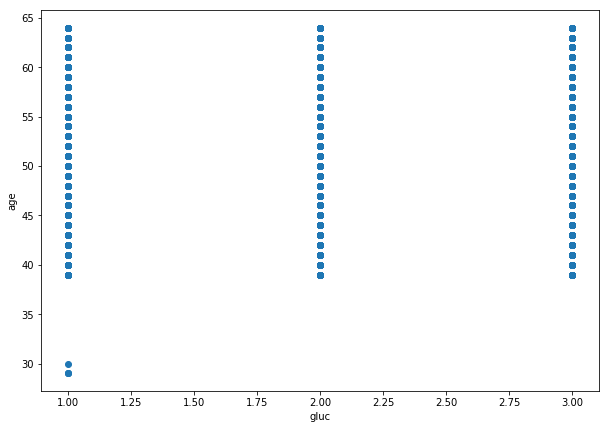


gluc gender
Ttest_indResult(statistic=-43.72831300960851, pvalue=0.0)


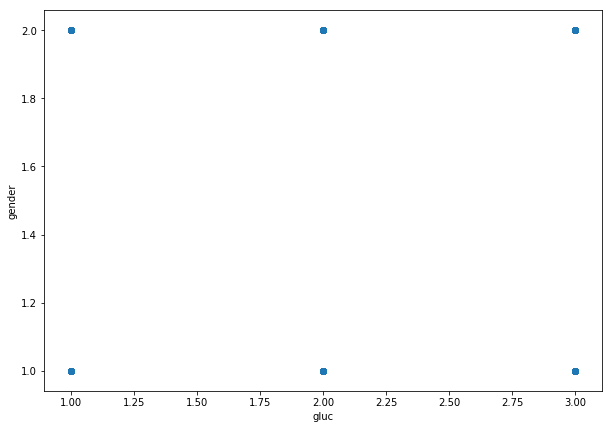


gluc height
Ttest_indResult(statistic=-5244.304937607281, pvalue=0.0)


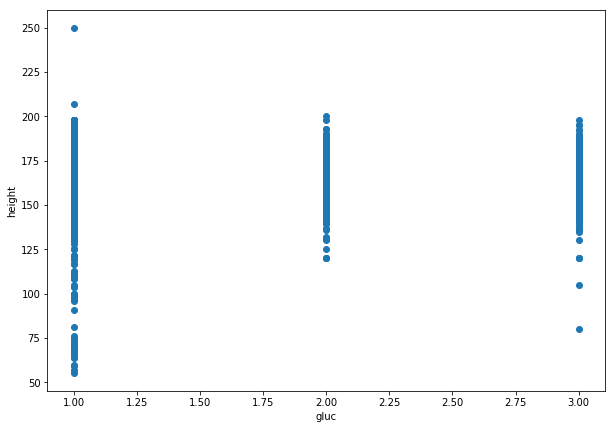


gluc weight
Ttest_indResult(statistic=-1340.2040756250938, pvalue=0.0)


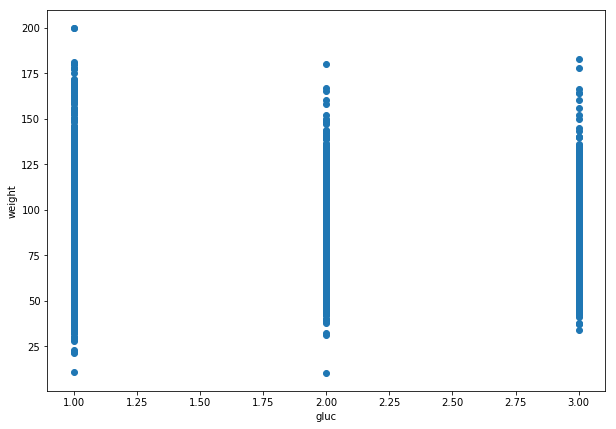


gluc ap_hi
Ttest_indResult(statistic=-219.18587125851016, pvalue=0.0)


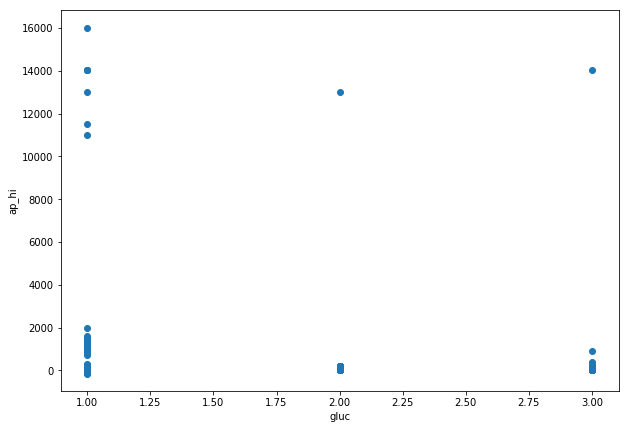


gluc ap_lo
Ttest_indResult(statistic=-133.92613806098515, pvalue=0.0)


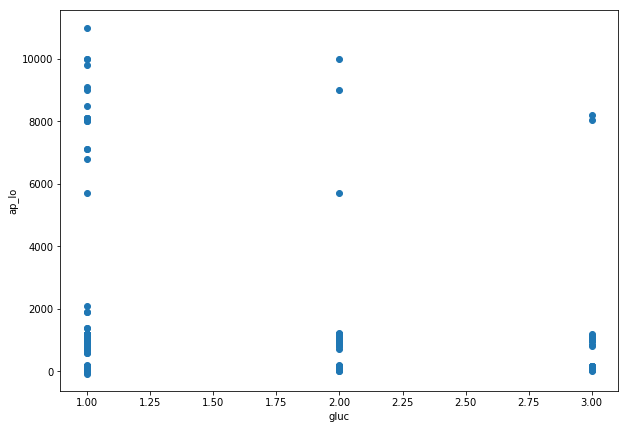


gluc cholesterol
Ttest_indResult(statistic=-41.79097587099554, pvalue=0.0)


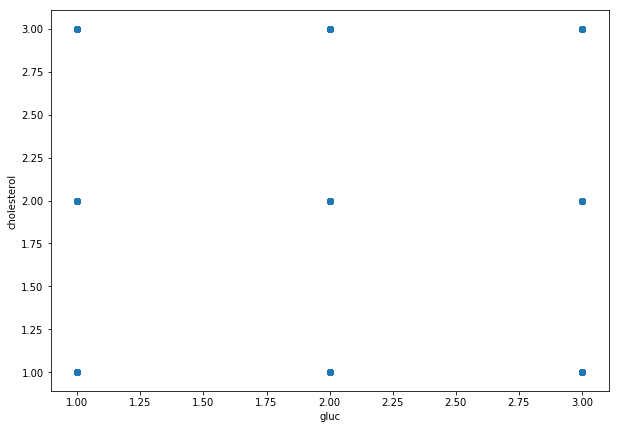


gluc gluc
Ttest_indResult(statistic=0.0, pvalue=1.0)


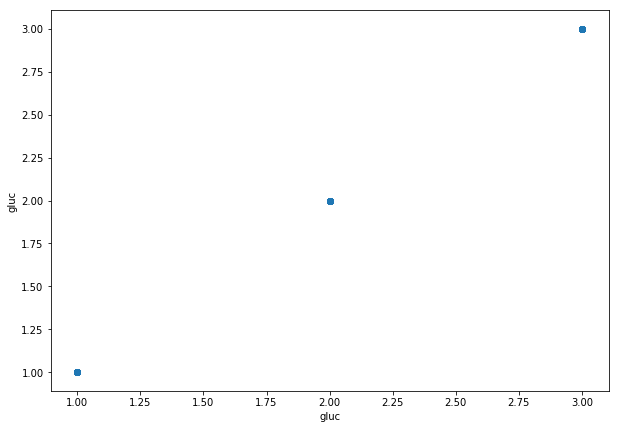


gluc smoke
Ttest_indResult(statistic=471.5883258970142, pvalue=0.0)


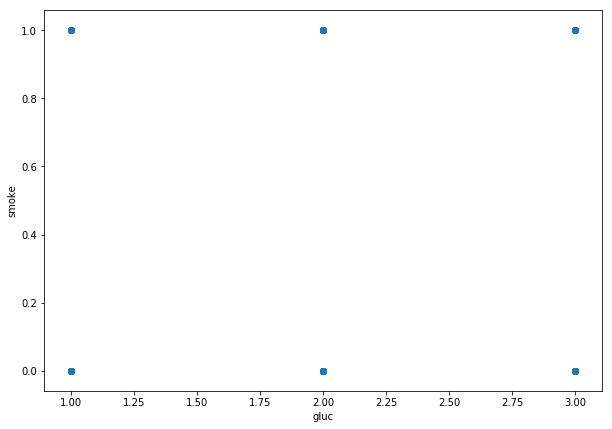


gluc alco
Ttest_indResult(statistic=504.3940768751431, pvalue=0.0)


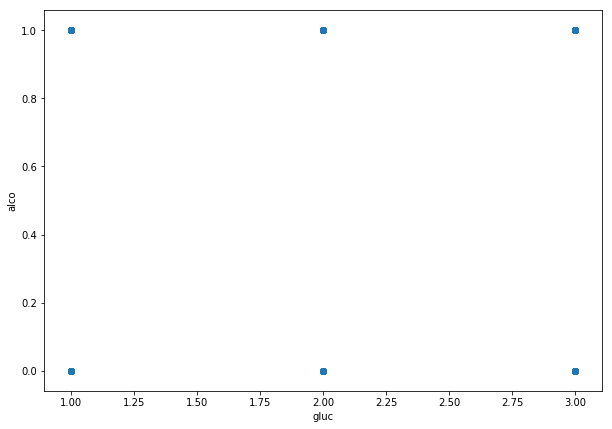


gluc active
Ttest_indResult(statistic=160.55739788748483, pvalue=0.0)


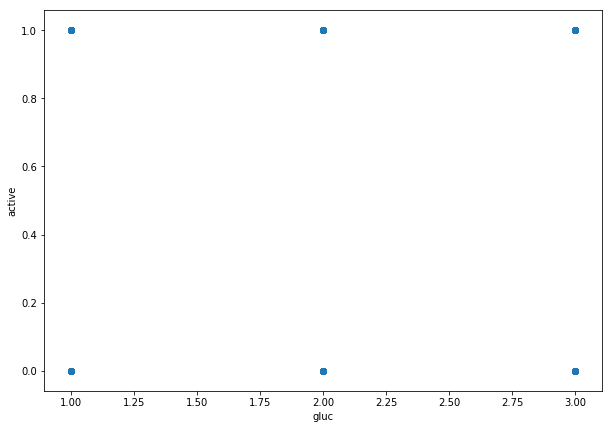


gluc cardio
Ttest_indResult(statistic=253.0250715182018, pvalue=0.0)


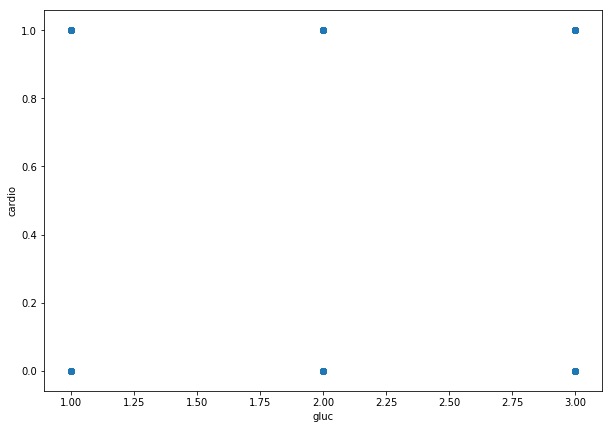


smoke age
Ttest_indResult(statistic=-2060.7722413290303, pvalue=0.0)


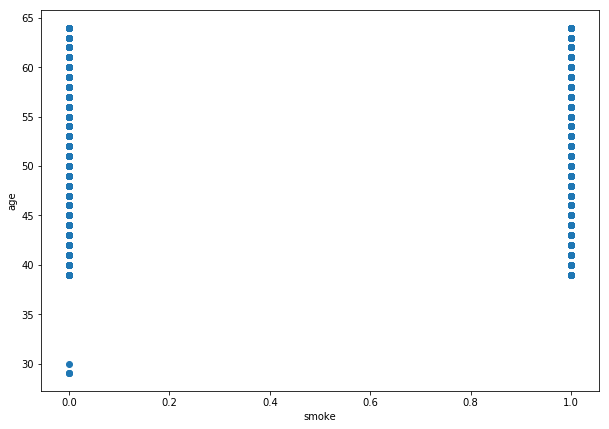


smoke gender
Ttest_indResult(statistic=-601.6256496645525, pvalue=0.0)


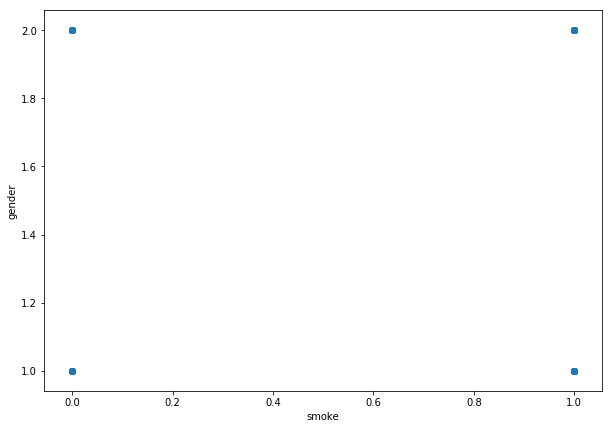


smoke height
Ttest_indResult(statistic=-5290.559590139113, pvalue=0.0)


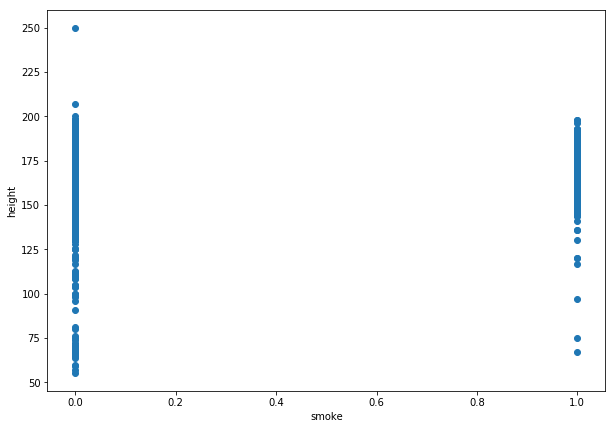


smoke weight
Ttest_indResult(statistic=-1361.9195530411323, pvalue=0.0)


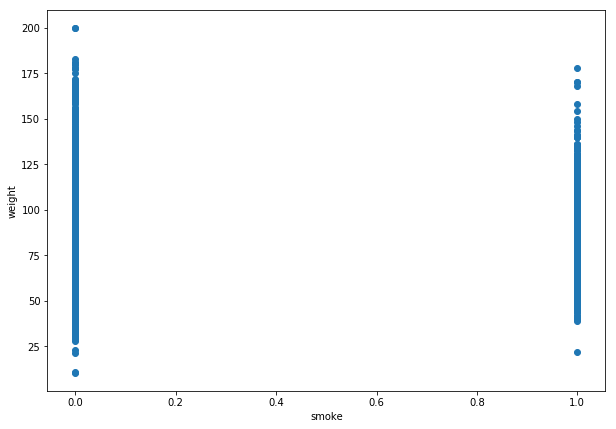


smoke ap_hi
Ttest_indResult(statistic=-221.14253639501783, pvalue=0.0)


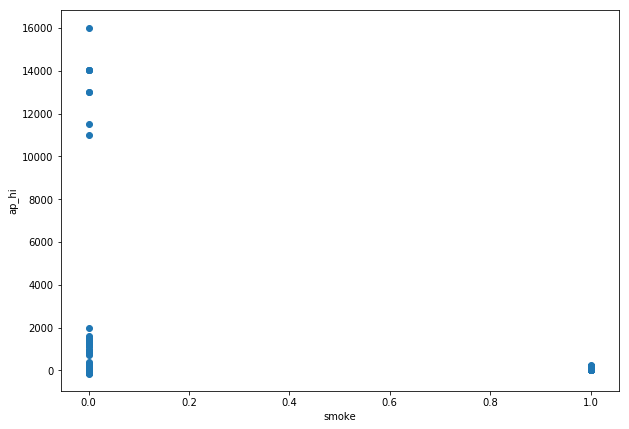


smoke ap_lo
Ttest_indResult(statistic=-135.52457202523658, pvalue=0.0)


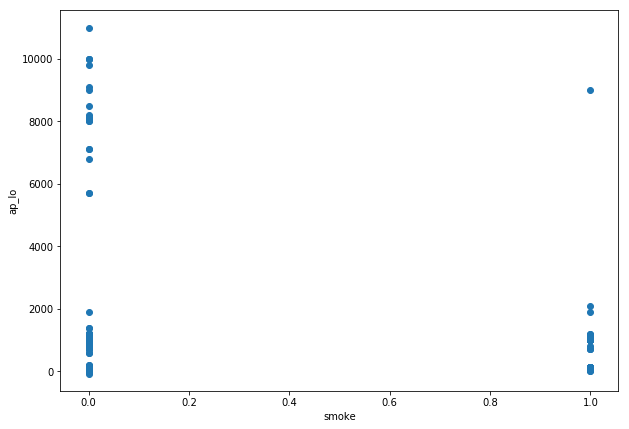


smoke cholesterol
Ttest_indResult(statistic=-459.0826665523878, pvalue=0.0)


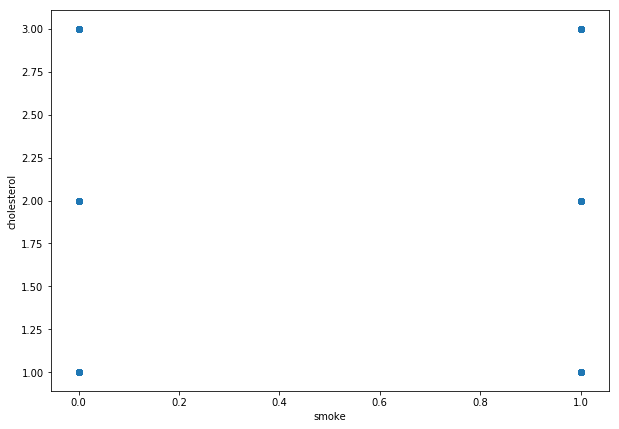


smoke gluc
Ttest_indResult(statistic=-471.5883258970142, pvalue=0.0)


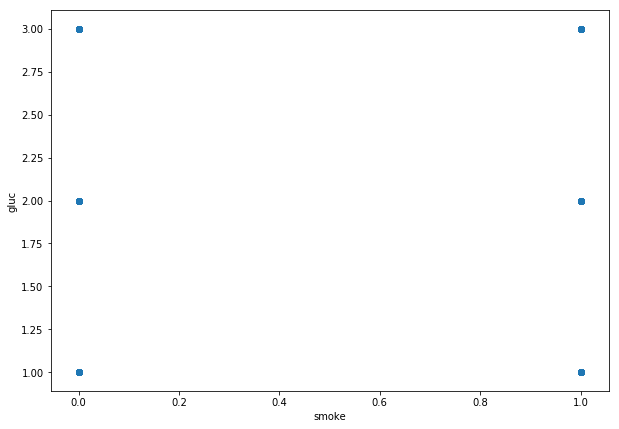


smoke smoke
Ttest_indResult(statistic=0.0, pvalue=1.0)


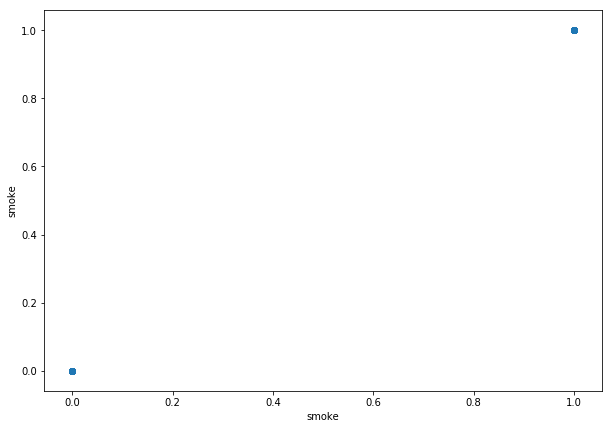


smoke alco
Ttest_indResult(statistic=25.091496134452303, pvalue=1.2500713322575293e-138)


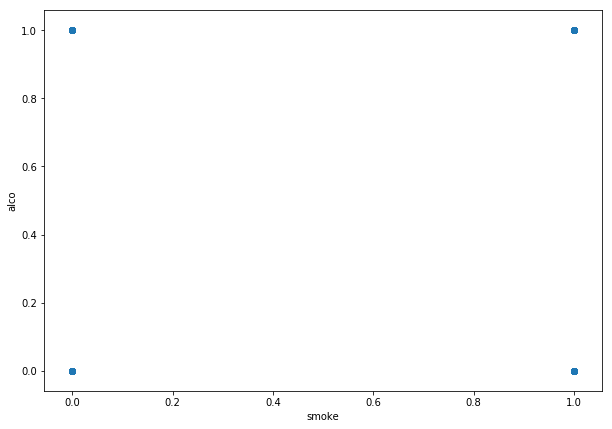


smoke active
Ttest_indResult(statistic=-387.9954463768856, pvalue=0.0)


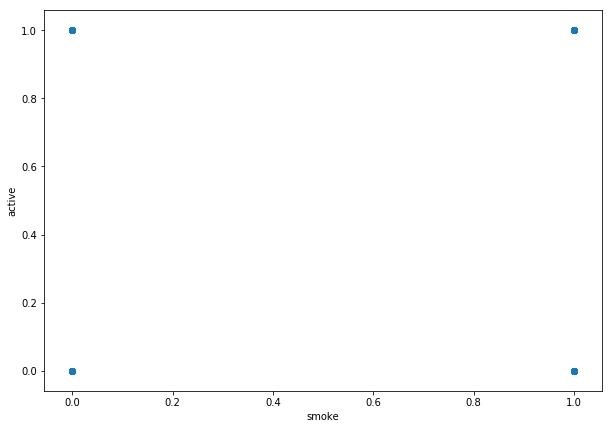


smoke cardio
Ttest_indResult(statistic=-189.45069394461075, pvalue=0.0)


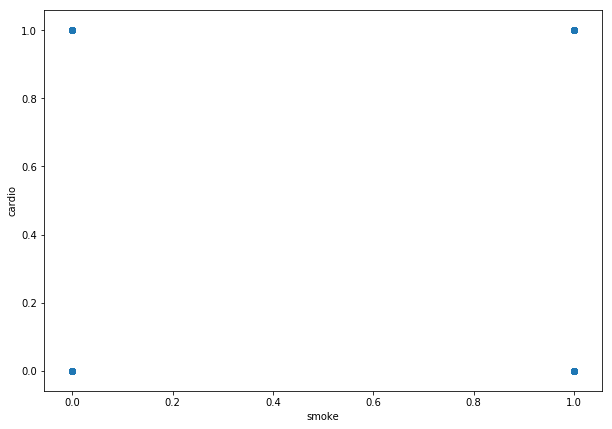


alco age
Ttest_indResult(statistic=-2062.7774221267236, pvalue=0.0)


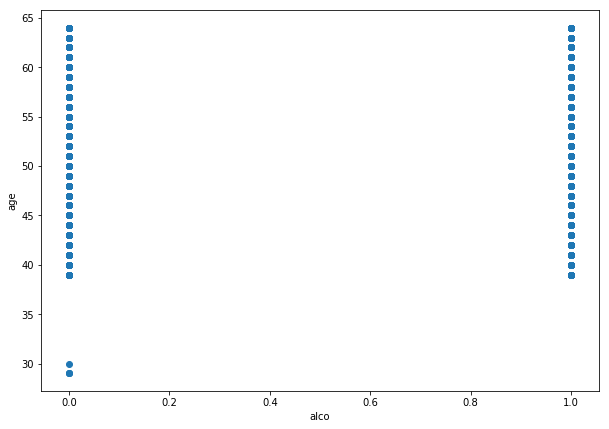


alco gender
Ttest_indResult(statistic=-649.9280591689027, pvalue=0.0)


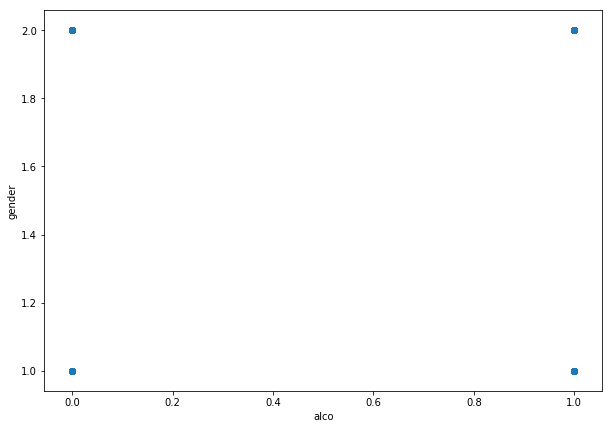


alco height
Ttest_indResult(statistic=-5292.822347644206, pvalue=0.0)


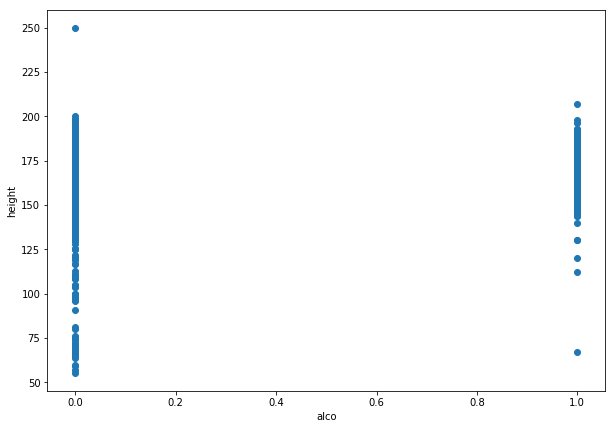


alco weight
Ttest_indResult(statistic=-1362.647762975185, pvalue=0.0)


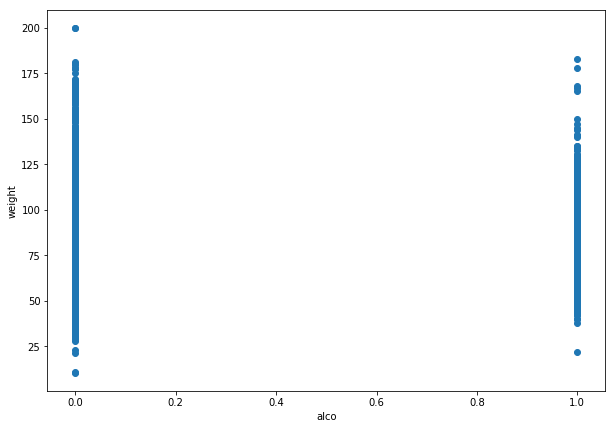


alco ap_hi
Ttest_indResult(statistic=-221.2016956598169, pvalue=0.0)


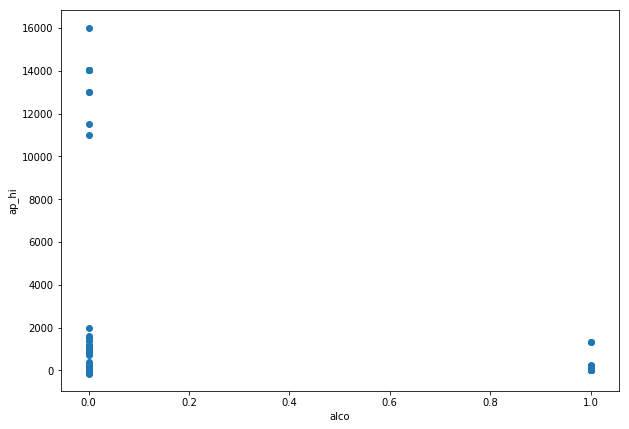


alco ap_lo
Ttest_indResult(statistic=-135.57285831352766, pvalue=0.0)


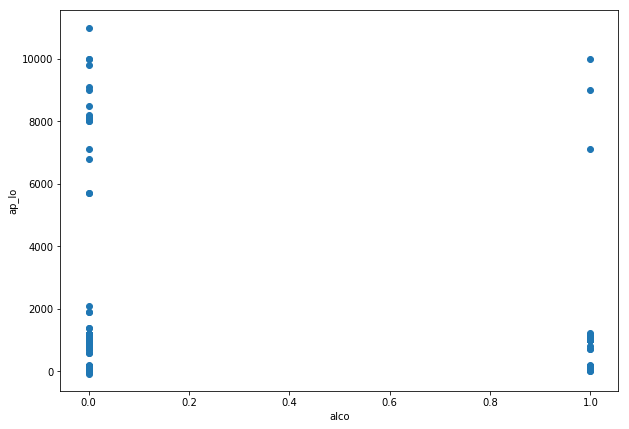


alco cholesterol
Ttest_indResult(statistic=-484.75834887141895, pvalue=0.0)


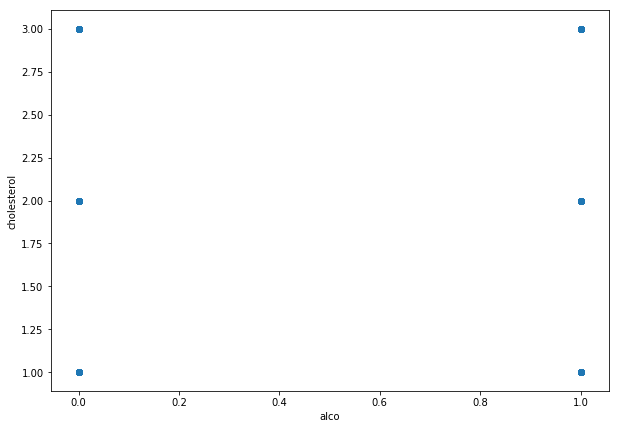


alco gluc
Ttest_indResult(statistic=-504.3940768751431, pvalue=0.0)


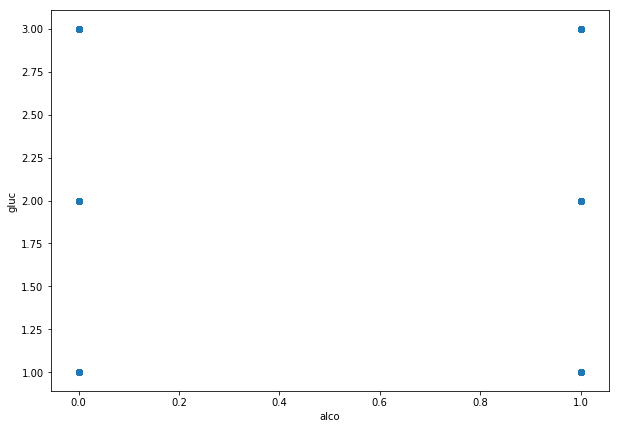


alco smoke
Ttest_indResult(statistic=-25.091496134452303, pvalue=1.2500713322575293e-138)


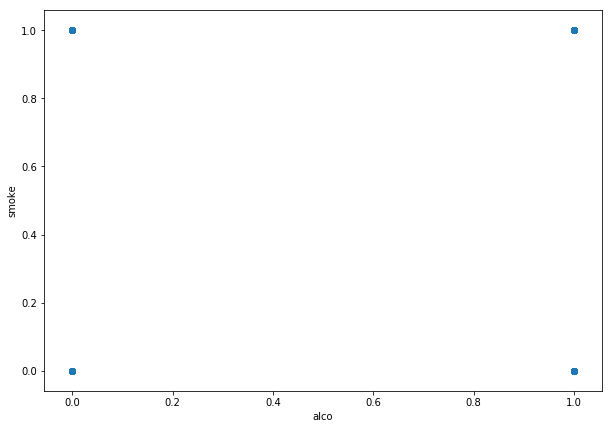


alco alco
Ttest_indResult(statistic=0.0, pvalue=1.0)


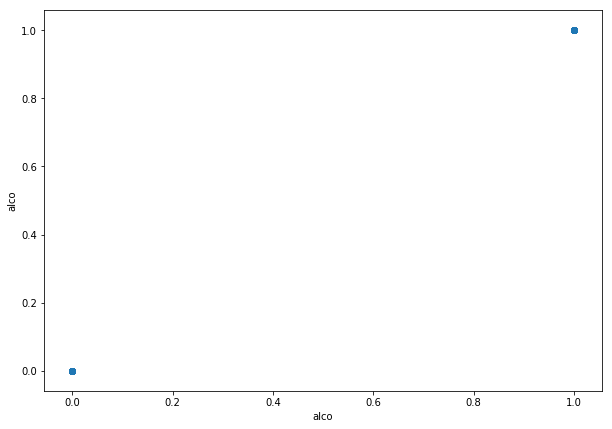


alco active
Ttest_indResult(statistic=-434.4051926157763, pvalue=0.0)


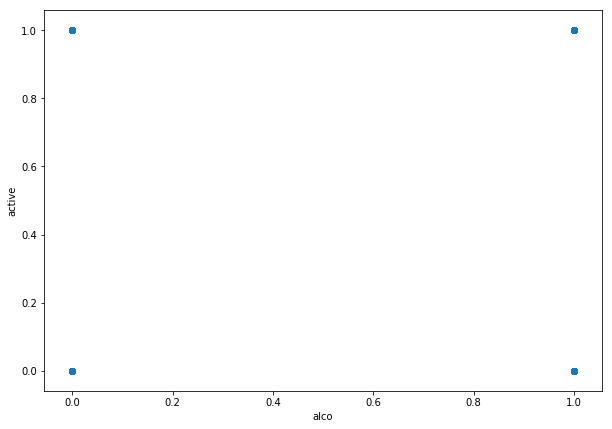


alco cardio
Ttest_indResult(statistic=-215.08720551638518, pvalue=0.0)


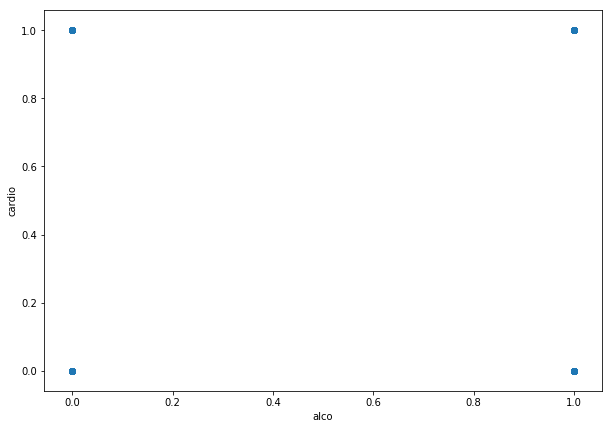


active age
Ttest_indResult(statistic=-2031.1047559318997, pvalue=0.0)


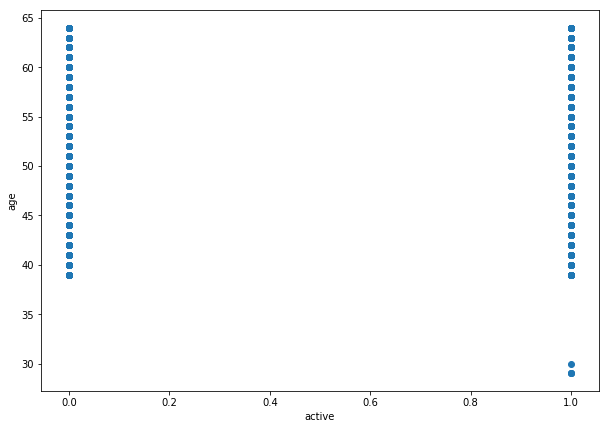


active gender
Ttest_indResult(statistic=-232.7101897573213, pvalue=0.0)


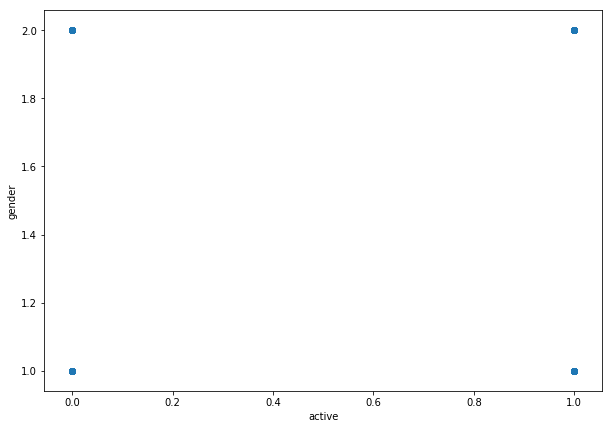


active height
Ttest_indResult(statistic=-5264.49519748537, pvalue=0.0)


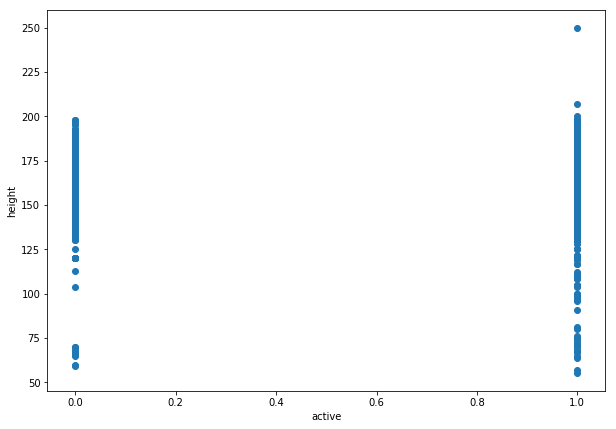


active weight
Ttest_indResult(statistic=-1348.5186472951482, pvalue=0.0)


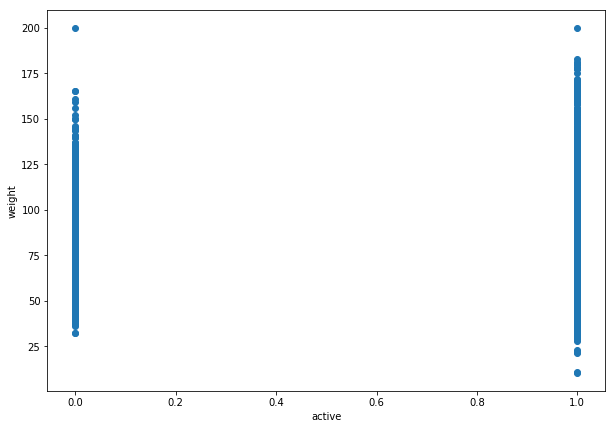


active ap_hi
Ttest_indResult(statistic=-219.9128555390622, pvalue=0.0)


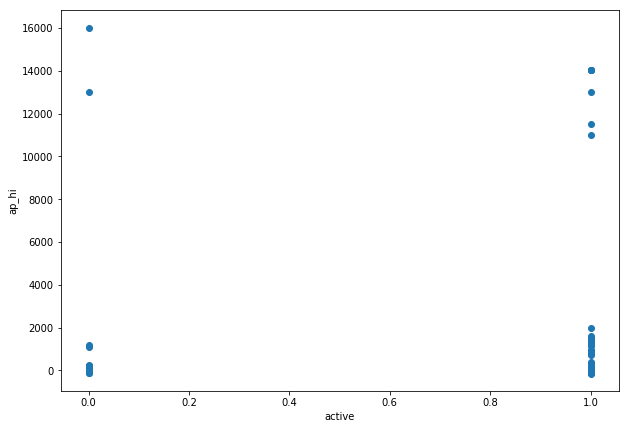


active ap_lo
Ttest_indResult(statistic=-134.51987724728332, pvalue=0.0)


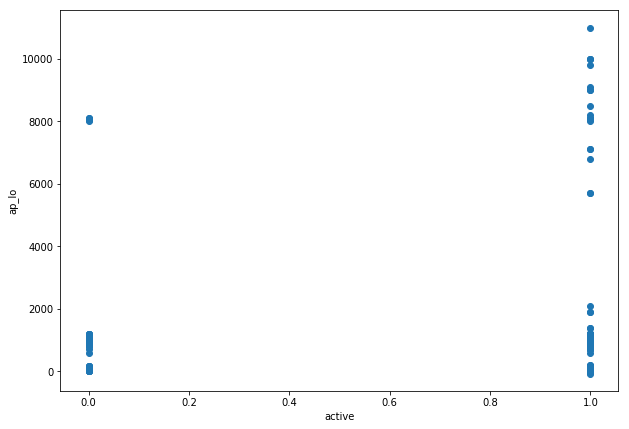


active cholesterol
Ttest_indResult(statistic=-189.14706023509154, pvalue=0.0)


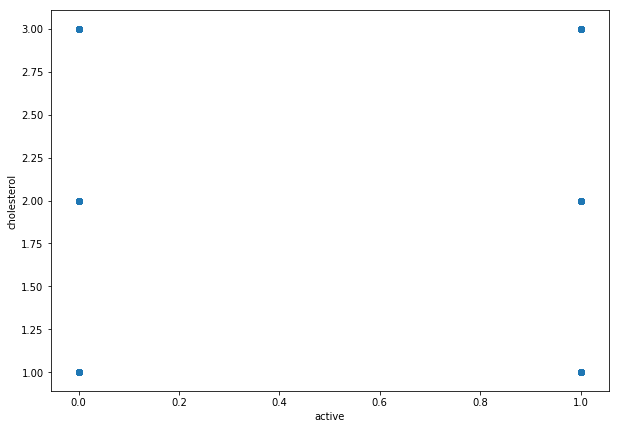


active gluc
Ttest_indResult(statistic=-160.55739788748483, pvalue=0.0)


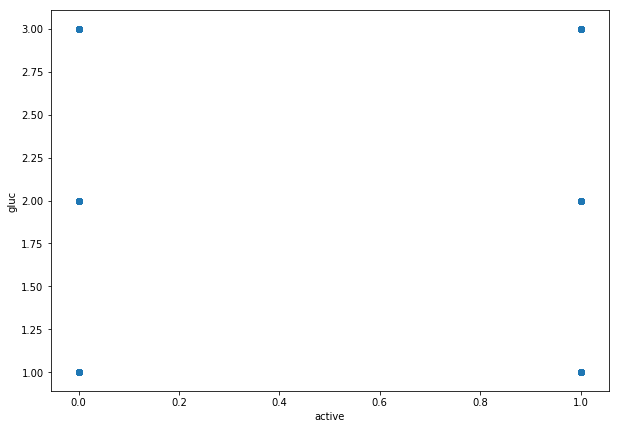


active smoke
Ttest_indResult(statistic=387.9954463768856, pvalue=0.0)


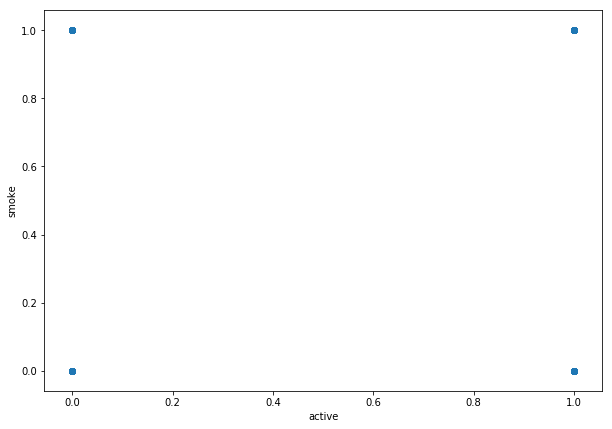


active alco
Ttest_indResult(statistic=434.4051926157763, pvalue=0.0)


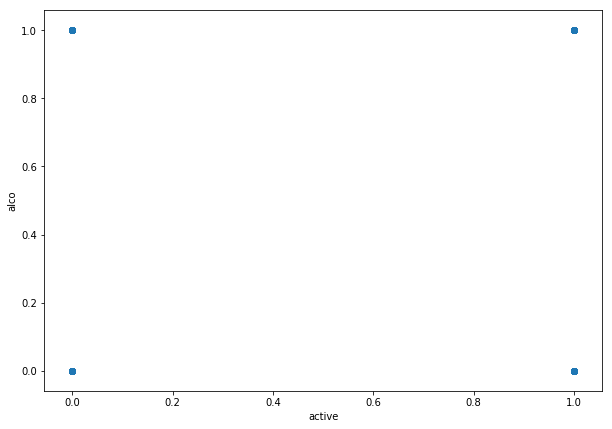


active active
Ttest_indResult(statistic=0.0, pvalue=1.0)


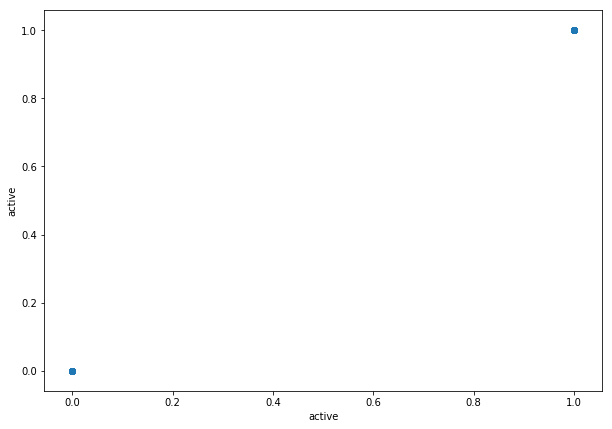


active cardio
Ttest_indResult(statistic=125.9690738549972, pvalue=0.0)


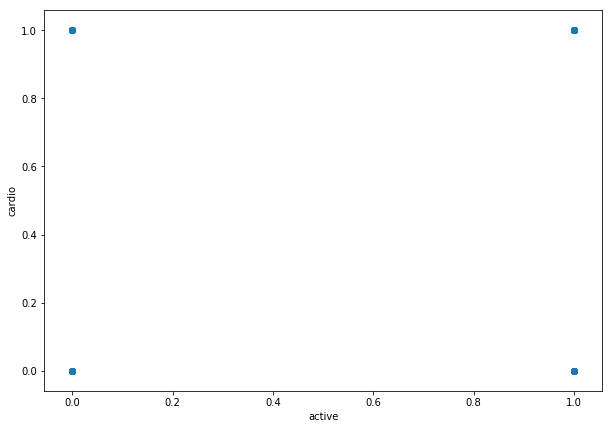


cardio age
Ttest_indResult(statistic=-2040.9237376911728, pvalue=0.0)


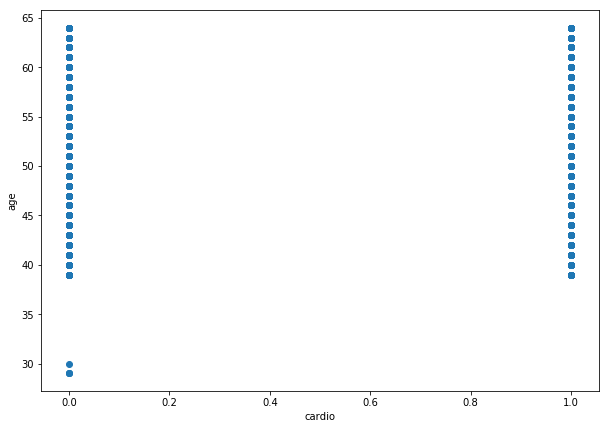


cardio gender
Ttest_indResult(statistic=-325.44009677870207, pvalue=0.0)


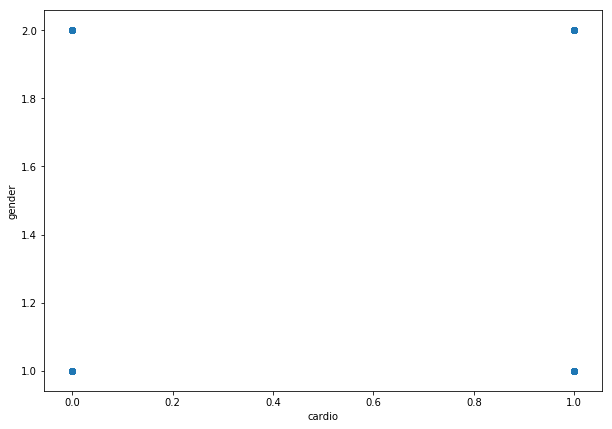


cardio height
Ttest_indResult(statistic=-5270.684127151105, pvalue=0.0)


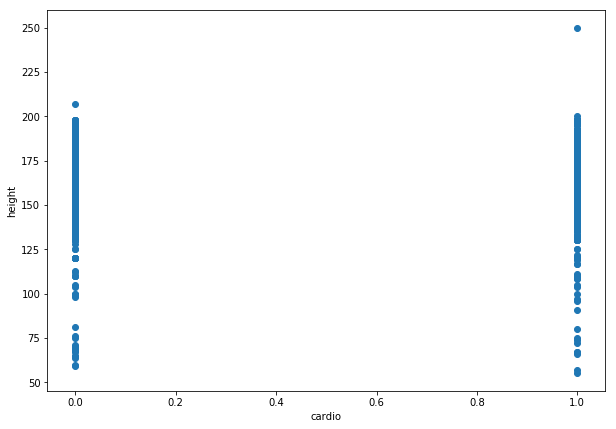


cardio weight
Ttest_indResult(statistic=-1353.803107070296, pvalue=0.0)


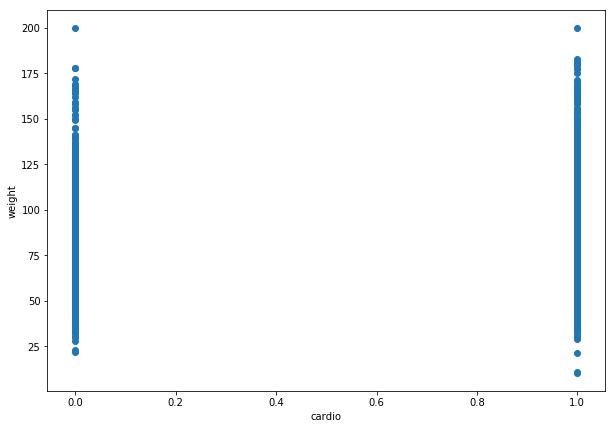


cardio ap_hi
Ttest_indResult(statistic=-220.4347136756729, pvalue=0.0)


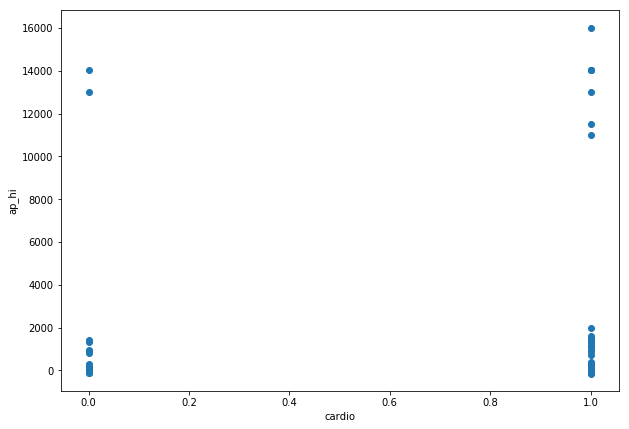


cardio ap_lo
Ttest_indResult(statistic=-134.94649217213913, pvalue=0.0)


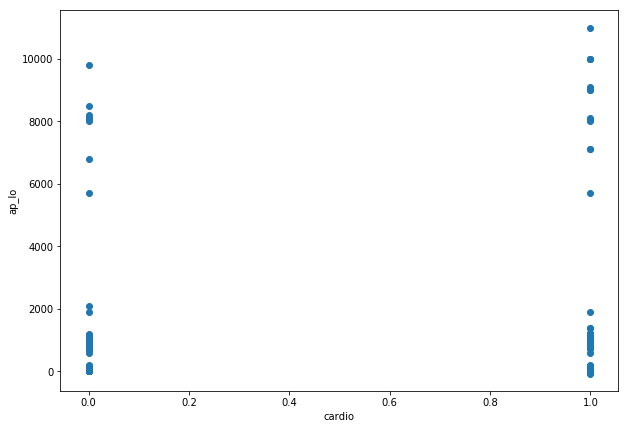


cardio cholesterol
Ttest_indResult(statistic=-271.7610361769627, pvalue=0.0)


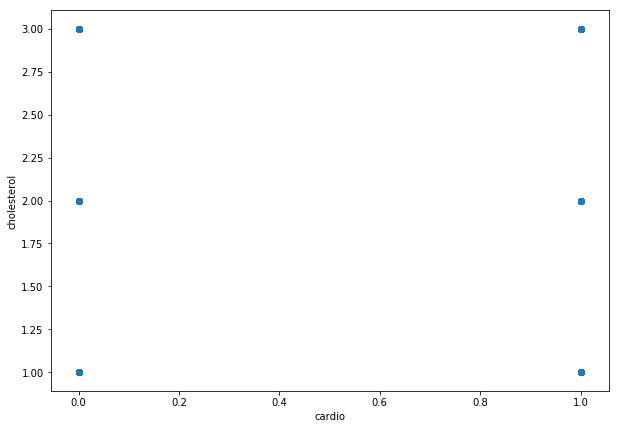


cardio gluc
Ttest_indResult(statistic=-253.0250715182018, pvalue=0.0)


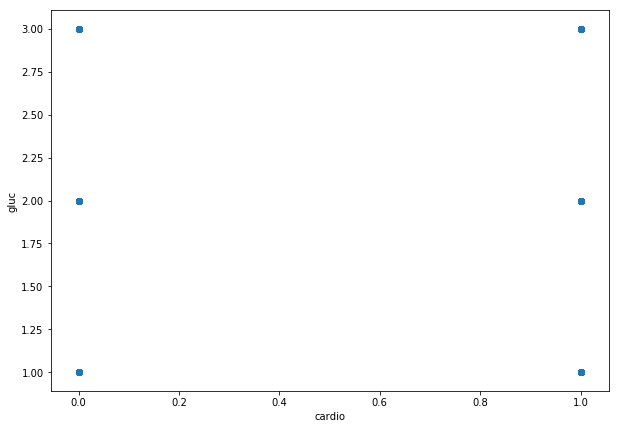


cardio smoke
Ttest_indResult(statistic=189.45069394461075, pvalue=0.0)


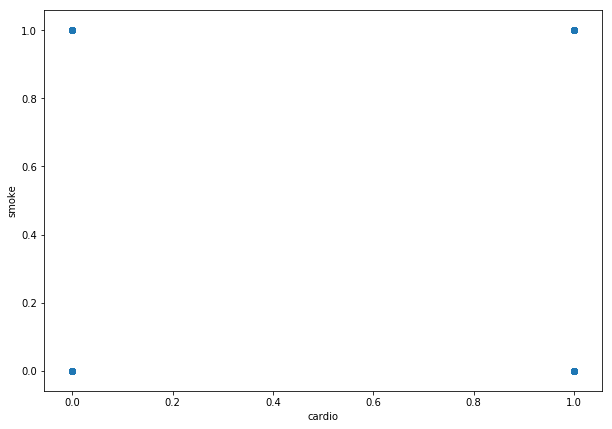


cardio alco
Ttest_indResult(statistic=215.08720551638518, pvalue=0.0)


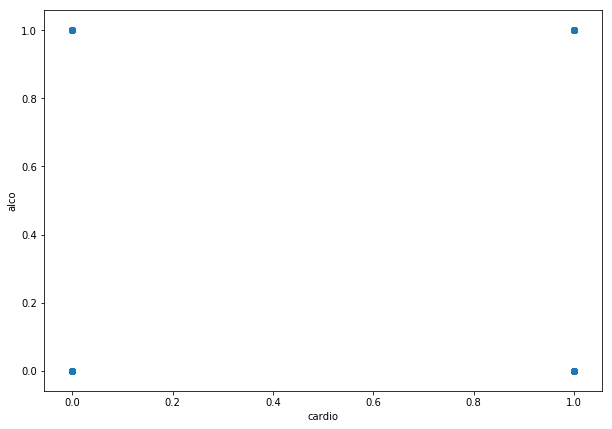


cardio active
Ttest_indResult(statistic=-125.9690738549972, pvalue=0.0)


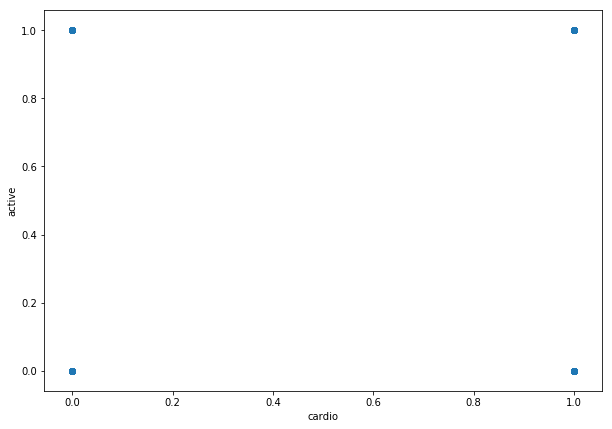


cardio cardio
Ttest_indResult(statistic=0.0, pvalue=1.0)


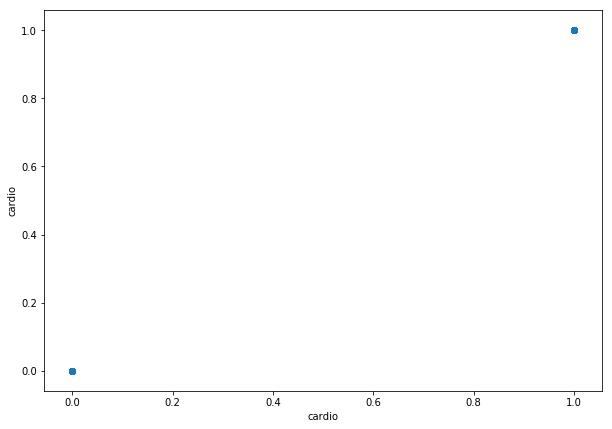

In [10]:
# Look at t-tests and p-values and also lookings for colinearity 
for i in df.columns:
    for j in df.columns:
        plt.figure(figsize=(10,7))
        print(i, j)
        print(stats.ttest_ind(df[i],df[j]))
        plt.scatter(df[i], df[j])
        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()
        print()

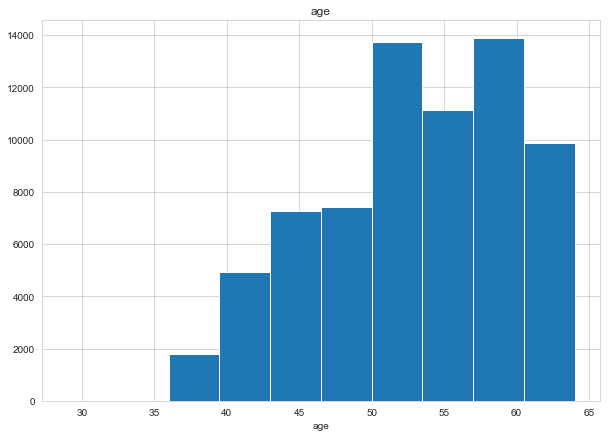

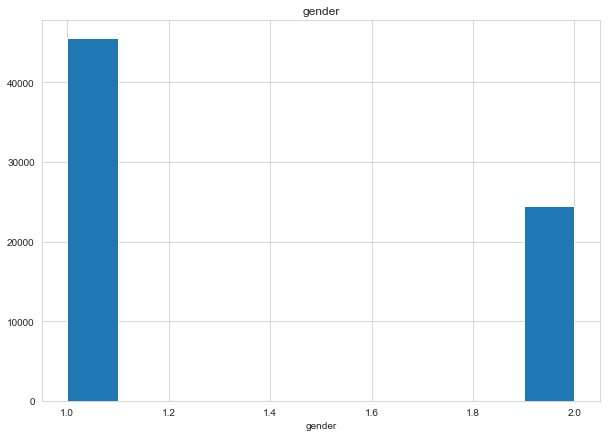

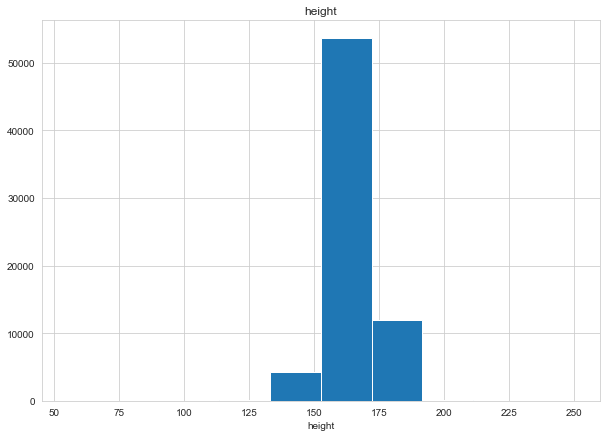

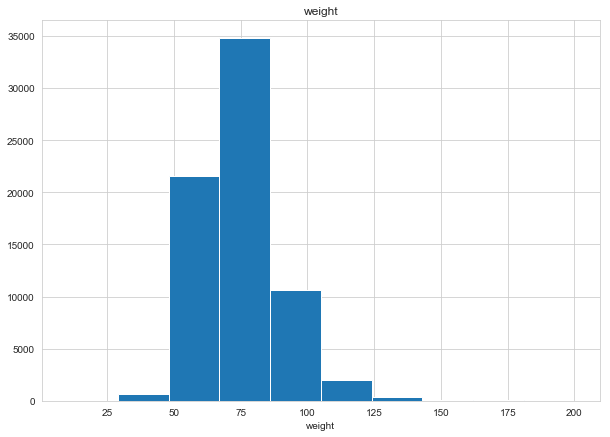

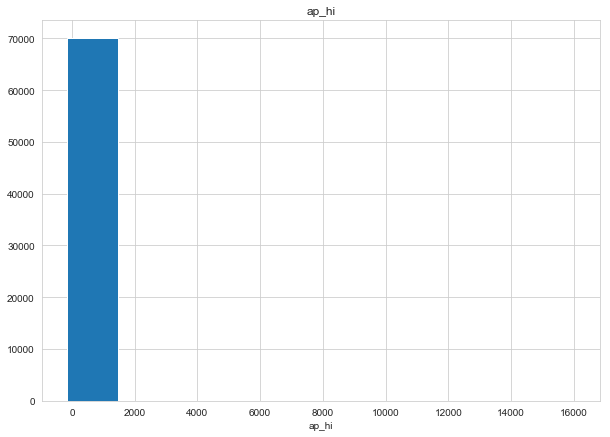

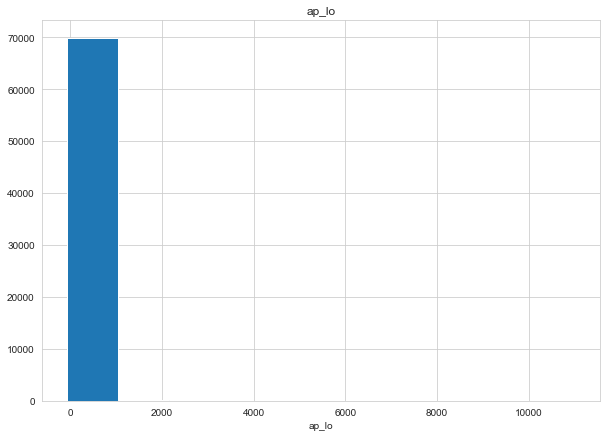

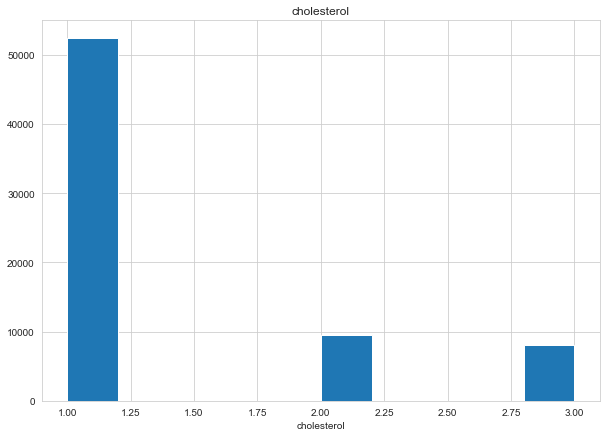

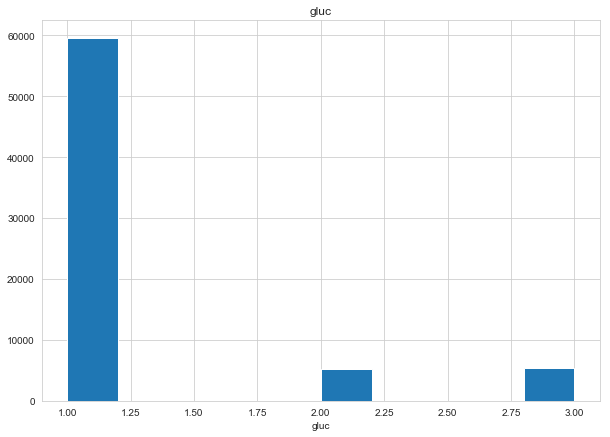

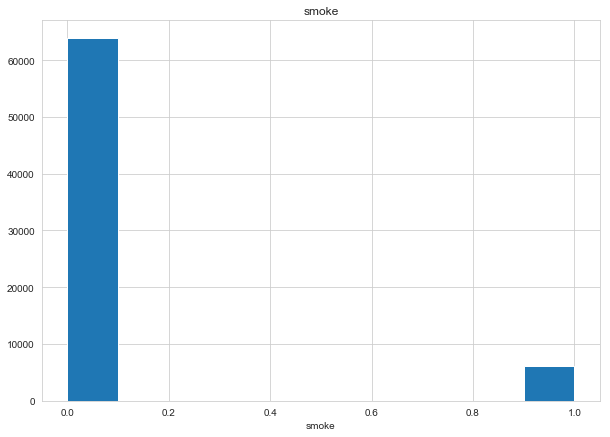

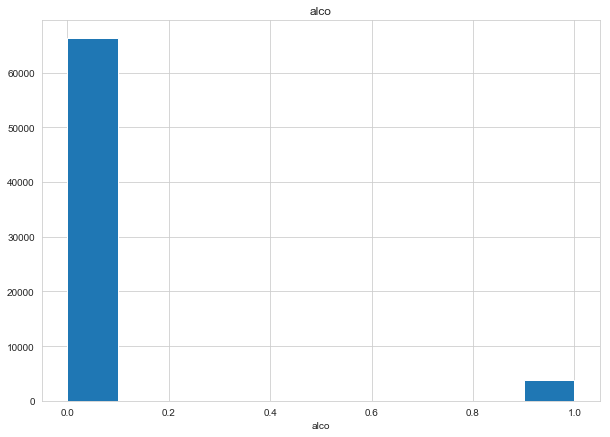

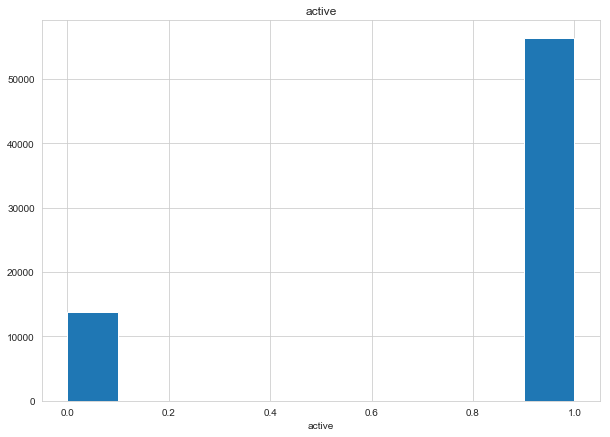

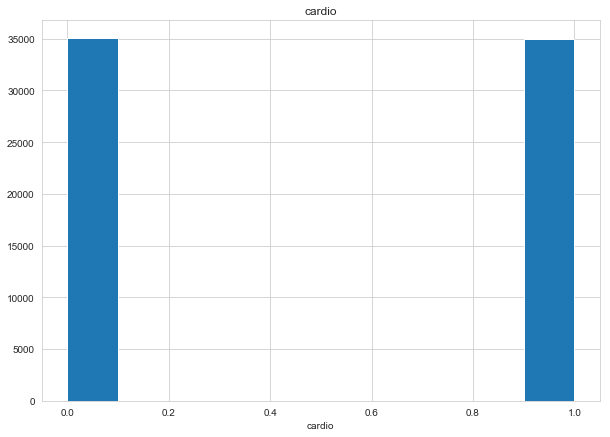

In [37]:
# Look at distribution 
sns.set_style('whitegrid')

for i in df.columns:
    plt.figure(figsize=(10,7))
    plt.hist(df[i])
    plt.title(i)
    plt.xlabel(i)
    plt.show()

In [10]:
# Drop features with high colinearity 
X = df.drop(['height', 'gluc', 'alco', 'cardio', 'gender'], 1)
y=df['cardio']

In [12]:
# logistic Regression

logreg = LogisticRegression(penalty='l1')
 
logreg.fit(X, y)
print('score without any holdout:', logreg.score(X, y))
print()
cross = cross_val_score(logreg, X, y, cv = 10)
print('Full scores of cross validation:', cross)
print()
print('Mean scores from cross validation:', cross.mean())


score without any holdout: 0.7204285714285714

Full scores of cross validation: [0.71546922 0.71142857 0.722      0.72714286 0.71457143 0.72342857
 0.72142857 0.72871429 0.71557143 0.71810259]

Mean scores from cross validation: 0.7197857519052486


In [16]:
# random forest
rfc = ensemble.RandomForestClassifier()

rfc.fit(X, y)
print('score without any holdout:', rfc.score(X, y))
print()
score = cross_val_score(rfc, X, y, cv=5)
print('full scores from cross validaiton:', score)
print()
print('mean scores from cross validation:', score.mean())

score without any holdout: 0.8640857142857142

full scores from cross validaiton: [0.68280837 0.69364286 0.68342857 0.68421429 0.68140581]

mean scores from cross validation: 0.6850999799634837


In [22]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Normalize data for Euclidean geometry
norm_X = normalize(X)
knn.fit(norm_X, y)
print('KNN score without any holdout:', knn.score(norm_X, y))
print()
score = cross_val_score(knn, X, y, cv=5)
print('full scores from cross validaiton:', score)
print()
print('mean scores from cross validation:', score.mean())

KNN score without any holdout: 0.8669

full scores from cross validaiton: [0.67766588 0.69471429 0.68035714 0.68292857 0.67683406]

mean scores from cross validation: 0.6824999881168367


In [18]:
pca = PCA(n_components=5)

pca.fit_transform(X)

pca.explained_variance_ratio_

array([5.97372638e-01, 3.98373111e-01, 3.47627620e-03, 7.66535271e-04,
       7.44925639e-06])

In [22]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X, y)
clf.score(X,y)

0.7374714285714286

In [23]:
score = cross_val_score(clf, X, y, cv=5)
print('full scores from cross validaiton:', score)
print()
print('mean scores from cross validation:', score.mean())

full scores from cross validaiton: [0.73201914 0.7395     0.73564286 0.73514286 0.73476677]

mean scores from cross validation: 0.735414324966108


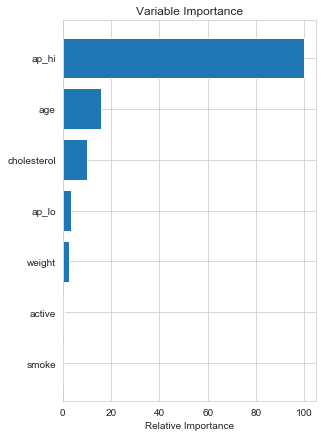

In [24]:
 feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()